<a href="https://colab.research.google.com/github/Wen9324/IBM-PredictCustomerChurn/blob/main/IBM_%E9%A0%90%E6%B8%AC%E5%AE%A2%E6%88%B6%E6%B5%81%E5%A4%B1_(R%E8%AA%9E%E8%A8%80)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM 預測客戶流失 - 邏輯回歸，決策樹和隨機森林 ------
產生Colab R 程式環境: https://colab.research.google.com/notebook#create=true&language=r

https://datascienceplus.com/predict-customer-churn-logistic-regression-decision-tree-and-random-forest/

客戶流失發生在客戶或訂戶停止與公司或服務（也稱為客戶流失）做生意時，而流失率在電信行業中也是特別有用且重要的。
與預測員工流動率相似的概念，將使用電信數據集預測客戶流失，將進一步應用Logistic回歸，決策樹和隨機森林進行資料分析。

In [ ]:
# 安裝必要套件
requiredPackages = c("plyr", "corrplot", "ggplot2", "gridExtra",
                     "ggthemes", "caret", "MASS", "randomForest", "party")
for(p in requiredPackages){
  if(!require(p,character.only = TRUE)) install.packages(p) #查看有無安裝
  library(p,character.only = TRUE)
}

library(plyr)
library(corrplot)
library(ggplot2)
library(gridExtra)
library(ggthemes)
library(caret)
library(MASS)
library(randomForest)
library(party)

Loading required package: plyr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘plyr’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Loading required package: corrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘corrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Loading required package: ggplot2

Loading required package: gridExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gridExtra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggthemes

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.r

# 1.0 數據預處理 Data Preprocessing -----

In [ ]:
### 1.0 數據預處理 Data Preprocessing -----
# 數據是從IBM Sample Data Sets下載的。 每行代表一個客戶，每列包含該客戶的屬性：
# The data was downloaded from IBM Sample Data Sets. Each row represents a customer, each column contains that customer’s attributes:

## IBM Guide to Sample Data Sets:
#  https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

In [ ]:
churn <- read.csv('/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv', stringsAsFactors = TRUE) #stringsAsFactors將字串變成因子變數

In [ ]:
str(churn)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Factor w/ 3 levels "No","

In [ ]:
names(churn)
# [1] "customerID"     "gender"           "SeniorCitizen"    "Partner"          "Dependents"
# [6] "tenure"         "PhoneService"     "MultipleLines"    "InternetService"  "OnlineSecurity"
# [11] "OnlineBackup"  "DeviceProtection" "TechSupport"      "StreamingTV"      "StreamingMovies"
# [16] "Contract"      "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"
# [21] "Churn"

# [1]客戶ID             性別                老年人              合作夥伴        家屬
# [6]任期               電話服務            多線                互聯網服務      在線安全
# [11]在線備份          設備保護            技術支持            流媒體電視      流媒體電影
# [16]合同              無紙化計費          付款方式            每月收取        總費用
# [21]流失

[1] "customerID"       "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TechSupport"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"

In [ ]:
summary(churn)

      customerID      gender     SeniorCitizen    Partner    Dependents
 0002-ORFBO:   1   Female:3488   Min.   :0.0000   No :3641   No :4933  
 0003-MKNFE:   1   Male  :3555   1st Qu.:0.0000   Yes:3402   Yes:2110  
 0004-TLHLJ:   1                 Median :0.0000                        
 0011-IGKFF:   1                 Mean   :0.1621                        
 0013-EXCHZ:   1                 3rd Qu.:0.0000                        
 0013-MHZWF:   1                 Max.   :1.0000                        
 (Other)   :7037                                                       
     tenure      PhoneService          MultipleLines     InternetService
 Min.   : 0.00   No : 682     No              :3390   DSL        :2421  
 1st Qu.: 9.00   Yes:6361     No phone service: 682   Fiber optic:3096  
 Median :29.00                Yes             :2971   No         :1526  
 Mean   :32.37                                                          
 3rd Qu.:55.00                                             

In [ ]:
# 原始數據包含7043行（客戶）和21列（功能）。 “Churn 流失”欄目是我們的目標。
# 如果每列中缺少值，我們使用sapply來檢查數字。
# 我們發現“TotalCharges”列中有11個缺失值。 所以，讓我們刪除所有缺少值的行。

# The raw data contains 7043 rows (customers) and 21 columns (features). The “Churn” column is our target.
# We use sapply to check the number if missing values in each columns. We found that there are 11 missing values in “TotalCharges” columns. So, let’s remove all rows with missing values.

sapply(churn, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

In [ ]:
dim(churn)
# [1] 7043   21
# # The raw data contains 7043 rows (customers) and 21 columns (features).
# # 原始數據包含7043行（客戶）和21列（功能）

[1] 7043   21

In [ ]:
churnOld <- churn #做備份以利之後進行處理
# churnOld keeps orginal datafram

## 刪除所有缺少值的行。

In [ ]:
?complete.cases

In [ ]:
complete.cases(churn)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [15] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [29] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [43] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [57] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [71] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [85] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
  [99] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [113] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [127] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [141] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [155] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [169] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [183] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [197] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [211] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [225] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [239] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [253] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [267] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [281] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [295] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [309] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [323] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [337] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [351] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [365] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [379] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [393] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [407] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [421] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [435] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [449] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [463] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [477] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [491] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [505] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [519] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [533] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [547] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [561] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [575] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [589] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [603] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [617] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [631] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [645] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [659] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [673] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [687] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [701] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [715] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [ ]:
churn <- churn[complete.cases(churn), ] #complete.cases(churn)功能為挑選沒有遺漏值的(為True)
churn <- churn[complete.cases(churn), ]
dim(churn)
# [1] 7032   21

[1] 7032   21

In [ ]:
View(churn)

# 2.0 Data wrangling 看看變量，我們可以看到我們有一些資料處理要做 ----

In [ ]:
### 2.0 Data wrangling 看看變量，我們可以看到我們有一些資料處理要做 ----
# Look at the variables, we can see that we have some wranglings to do.
### 2.1 我們將六個欄中的“No internet service無互聯網服務”改為“否No” ------
# 它們是：“OnlineSecurity”，“OnlineBackup”，“DeviceProtection”，“TechSupport”，“streamingTV”，“streamingMovies”。

# Look at the variables, we can see that we have some wranglings to do.
# 1. We will change “No internet service” to “No” for six columns, they are: “OnlineSecurity”, “OnlineBackup”,
# “DeviceProtection”, “TechSupport”, “streamingTV”, “streamingMovies”.

In [ ]:
churn$OnlineSecurity #秀OnlineSecurity此變數

[1] No                  Yes                 Yes                
   [4] Yes                 No                  No                 
   [7] No                  Yes                 No                 
  [10] Yes                 Yes                 No internet service
  [13] No                  No                  Yes                
  [16] Yes                 No internet service Yes                
  [19] No                  No                  No                 
  [22] No internet service No internet service No                 
  [25] Yes                 Yes                 No                 
  [28] No                  Yes                 No                 
  [31] Yes                 No                  Yes                
  [34] No internet service No                  Yes                
  [37] No                  No                  No                 
  [40] No                  No                  Yes                
  [43] No internet service Yes                 Yes                
  [46] No                  No                  No                 
  [49] Yes                 Yes                 No                 
  [52] Yes                 Yes                 No                 
  [55] Yes                 No                  Yes                
  [58] No                  No internet service No                 
  [61] No                  No                  Yes                
  [64] No                  No                  No                 
  [67] No                  No                  No internet service
  [70] Yes                 No                  No internet service
  [73] Yes                 No internet service Yes                
  [76] Yes                 No                  Yes                
  [79] Yes                 No internet service No                 
  [82] Yes                 No                  No                 
  [85] No internet service No                  Yes                
  [88] No internet service No internet service No                 
  [91] No                  No                  Yes                
  [94] Yes                 No                  Yes                
  [97] Yes                 No internet service No internet service
 [100] No                  No internet service No internet service
 [103] No                  No                  No                 
 [106] No                  Yes                 Yes                
 [109] No                  No internet service Yes                
 [112] Yes                 No                  No                 
 [115] No                  Yes                 Yes                
 [118] Yes                 No internet service No                 
 [121] No                  No internet service No                 
 [124] Yes                 No internet service Yes                
 [127] No                  No internet service No internet service
 [130] Yes                 No                  Yes                
 [133] No                  No                  No                 
 [136] No internet service Yes                 No internet service
 [139] No internet service No                  Yes                
 [142] Yes                 No                  Yes                
 [145] No internet service Yes                 No internet service
 [148] No                  No                  No                 
 [151] No                  No                  Yes                
 [154] Yes                 No internet service No                 
 [157] No                  No internet service Yes                
 [160] No internet service Yes                 Yes                
 [163] No                  No                  No internet service
 [166] No internet service No                  Yes                
 [169] No                  No internet service Yes                
 [172] No                  No                  No                 
 [175] No internet service No internet service No                 
 [178] Yes                 No                  No 

In [ ]:
levels(churn$OnlineSecurity) #看此變數有幾類
# [1] "No"   "No internet service"  "Yes"  >>> ?

[1] "No"                  "No internet service" "Yes"

In [ ]:
# NULL >>> 改用 sapply (use sapply for multi-variables)
levels(churn[ ,10:15])  # NULL >>> 改用 sapply (use sapply for multi-variables)

NULL

In [ ]:
sapply(churn[ ,10:15], function(x) levels(x))

OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,No,No,No,No,No
No internet service,No internet service,No internet service,No internet service,No internet service,No internet service
Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
### 2.1 我們將六個欄中的“No internet service無互聯網服務”改為“否No” ------
# 它們是：“OnlineSecurity”，“OnlineBackup”，“DeviceProtection”，“TechSupport”，“streamingTV”，“streamingMovies”。

# Look at the variables, we can see that we have some wranglings to do.
# 1. We will change “No internet service” to “No” for six columns, they are: “OnlineSecurity”, “OnlineBackup”,
# “DeviceProtection”, “TechSupport”, “streamingTV”, “streamingMovies”.

In [ ]:
cols_recode1 <- c(10:15)
# [1] 10 11 12 13 14 15
for(i in 1:ncol(churn[,cols_recode1])) {
    churn[,cols_recode1][,i] <- as.factor(mapvalues
                        (churn[,cols_recode1][,i],
                        from =c("No internet service"),to=c("No"))) #將No internet service轉成No
}

In [ ]:
lapply(churn[ ,10:15], function(x) levels(x)) #再次查看

$OnlineSecurity
[1] "No"  "Yes"

$OnlineBackup
[1] "No"  "Yes"

$DeviceProtection
[1] "No"  "Yes"

$TechSupport
[1] "No"  "Yes"

$StreamingTV
[1] "No"  "Yes"

$StreamingMovies
[1] "No"  "Yes"

In [ ]:
### 2.2 對於“多行 MultipleLines”欄，我們會將“無電話服務 No phone service”更改為“否 No” -----
# 2.2 We will change “No phone service” to “No” for column “MultipleLines”

levels(churn$MultipleLines)
# [1] "No"  "No phone service" "Yes"

[1] "No"               "No phone service" "Yes"

In [ ]:
churn$MultipleLines <- as.factor(mapvalues(churn$MultipleLines,  #可用mapvalues進行替換
                  from=c("No phone service"),
                  to=c("No")))
levels(churn$MultipleLines)
# [1] "No"  "Yes"

In [ ]:
?mapvalues

# 2.3 由於最短任期為1個月，最長任期為72個月，我們可以將他們分為五個任期組：---

In [ ]:
# 2.3 由於最短任期為1個月，最長任期為72個月，我們可以將他們分為五個任期組：-----
# 2.3 Since the minimum tenure is 1 month and maximum tenure is 72 months, we can group them into five tenure groups:
# “0–12 Month”, “12–24 Month”, “24–48 Months”, “48–60 Month”, “> 60 Month”

In [ ]:
min(churn$tenure); max(churn$tenure)
# [1] 1
# [1] 72

[1] 1

[1] 72

In [ ]:
# R 何如將連續數據分區 >>> search this key words
# cut(x, …)
# S3 method for default
# cut(x, breaks, labels = NULL,
#     include.lowest = FALSE, right = TRUE, dig.lab = 3,
#     ordered_result = FALSE, …)

head(churn$tenure)
# [1]  1 34  2 45  2  8

[1]  1 34  2 45  2  8

In [ ]:
breaks <- c(0,12,24,48,60, 100) #設定階段
tenure_group <- cut(churn$tenure, breaks, labels = NULL, #用cut進行切割
                          include.lowest = FALSE, right = TRUE, dig.lab = 3,
                          ordered_result = FALSE)
head(tenure_group)
# [1] (0,12]  (24,48] (0,12]  (24,48] (0,12]  (0,12]
# Levels: (0,12] (12,24] (24,48] (48,60] (60,100]

[1] (0,12]  (24,48] (0,12]  (24,48] (0,12]  (0,12] 
Levels: (0,12] (12,24] (24,48] (48,60] (60,100]

In [ ]:
class(tenure_group) # [1] "factor"

[1] "factor"

In [ ]:
dim(churn)  # [1] 7032   21
churn$tenure_group <- tenure_group
dim(churn)  # [1] 7032   22

[1] 7032   21

[1] 7032   22

In [ ]:
### 2.4. Change the values in column “SeniorCitizen” from 0 or 1 to “No” or “Yes”. ---
#        將“老年公民”欄中的值從0或1更改為“否”或“是”。---
head(churn$SeniorCitizen, 50)
table(churn$SeniorCitizen)
#    0    1
# 5890 1142
churn$SeniorCitizen <- as.factor(mapvalues(churn$SeniorCitizen,
                        from=c("0","1"),
                        to=c("No", "Yes")))
table(churn$SeniorCitizen)
#   No  Yes
# 5890 1142

[1] No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No  No 
[20] No  Yes No  No  No  No  No  No  No  No  No  Yes Yes No  No  Yes No  No  No 
[39] No  No  No  No  No  No  No  No  No  No  No  No 
Levels: No Yes


  No  Yes 
5890 1142 

The following `from` values were not present in `x`: 0, 1




  No  Yes 
5890 1142 

In [ ]:
### 2.5. Remove the columns we do not need for the analysis.----
#        刪除我們不需要進行分析的列.----
churn$customerID <- NULL
churn$tenure <- NULL
dim(churn)  # [1] 7032   20

[1] 7032   20

In [ ]:
names(churn)

[1] "gender"           "SeniorCitizen"    "Partner"          "Dependents"      
 [5] "PhoneService"     "MultipleLines"    "InternetService"  "OnlineSecurity"  
 [9] "OnlineBackup"     "DeviceProtection" "TechSupport"      "StreamingTV"     
[13] "StreamingMovies"  "Contract"         "PaperlessBilling" "PaymentMethod"   
[17] "MonthlyCharges"   "TotalCharges"     "Churn"            "tenure_group"

In [ ]:
churn

# 3.0 探索性數據分析和特徵選擇 Exploratory data analysis and feature selection -

In [ ]:
is.numeric(churn$gender)

[1] FALSE

In [ ]:
### 3.0 Exploratory data analysis and feature selection ----
#       探索性數據分析和特徵選擇
### 3.1 Correlation between numeric variables ----
#       數值變量之間的相關性
numeric.var <- sapply(churn, is.numeric) #sapply是迭帶函數，is.numeric看是否是數值型
numeric.var

gender    SeniorCitizen          Partner       Dependents 
           FALSE            FALSE            FALSE            FALSE 
    PhoneService    MultipleLines  InternetService   OnlineSecurity 
           FALSE            FALSE            FALSE            FALSE 
    OnlineBackup DeviceProtection      TechSupport      StreamingTV 
           FALSE            FALSE            FALSE            FALSE 
 StreamingMovies         Contract PaperlessBilling    PaymentMethod 
           FALSE            FALSE            FALSE            FALSE 
  MonthlyCharges     TotalCharges            Churn     tenure_group 
            TRUE             TRUE            FALSE            FALSE

## 相關係數

In [ ]:
corr.matrix <- cor(churn[ ,numeric.var])
corr.matrix

,MonthlyCharges,TotalCharges
MonthlyCharges,1.0000000,0.6510648
TotalCharges,0.6510648,1.0000000


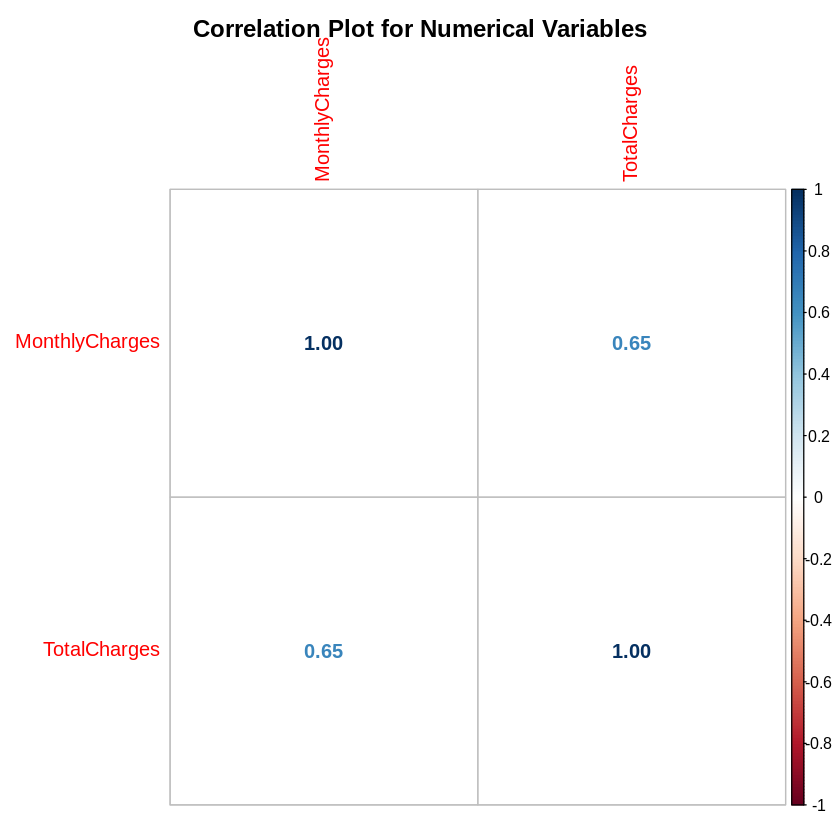

In [ ]:
# Gives this plot 給出這個圖形：
corrplot(corr.matrix, main="\n\nCorrelation Plot for Numerical Variables", method="number")

# 3.2 他的每月費用和總費用是相關的 The Monthly Charges and Total Charges are correlated. ----

In [ ]:
### 3.2 他的每月費用和總費用是相關的 The Monthly Charges and Total Charges are correlated. ----
# So one of them will be removed from the model. We remove Total Charges.
# 因此，其中一個將從模型中刪除。 我們刪除總費用。

churn$TotalCharges <- NULL
dim(churn)  # [1] 7032   19

[1] 7032   19

In [ ]:
names(churn)

[1] "gender"           "SeniorCitizen"    "Partner"          "Dependents"      
 [5] "PhoneService"     "MultipleLines"    "InternetService"  "OnlineSecurity"  
 [9] "OnlineBackup"     "DeviceProtection" "TechSupport"      "StreamingTV"     
[13] "StreamingMovies"  "Contract"         "PaperlessBilling" "PaymentMethod"   
[17] "MonthlyCharges"   "Churn"            "tenure_group"

# 3.3 Bar plots of categorical variables 分類變量的條形圖---

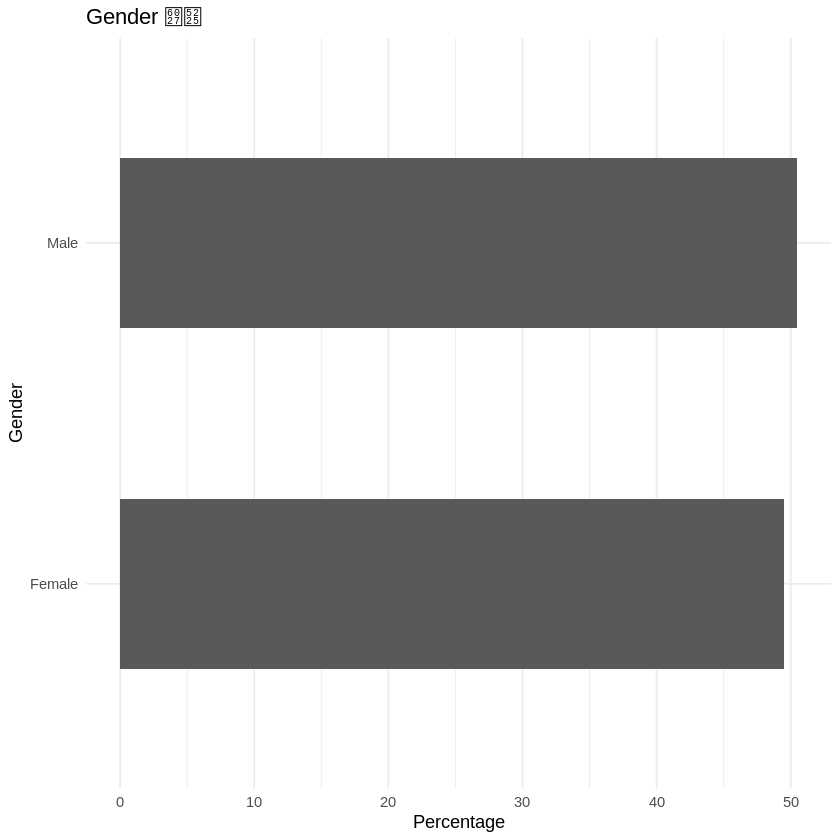

In [ ]:
p1 <- ggplot(churn, aes(x=gender)) + ggtitle("Gender 性別") + xlab("Gender") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p1   # Gender 性別

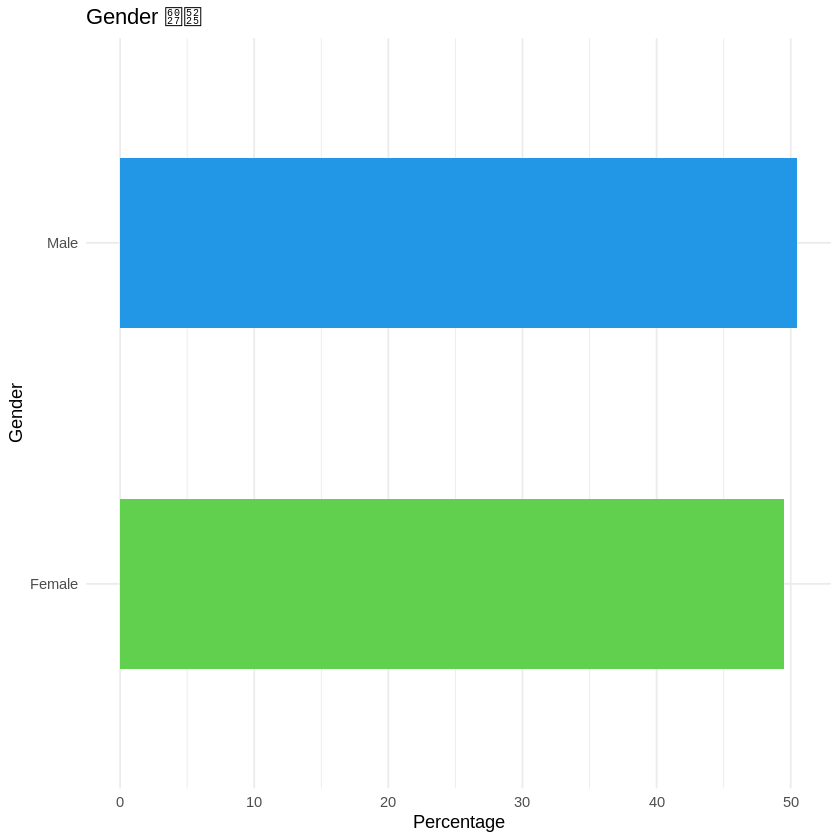

In [ ]:
p1a <- ggplot(churn, aes(x=gender)) + ggtitle("Gender 性別") + xlab("Gender") +
  geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:4) + ylab("Percentage") +
  coord_flip() + theme_minimal()
p1a

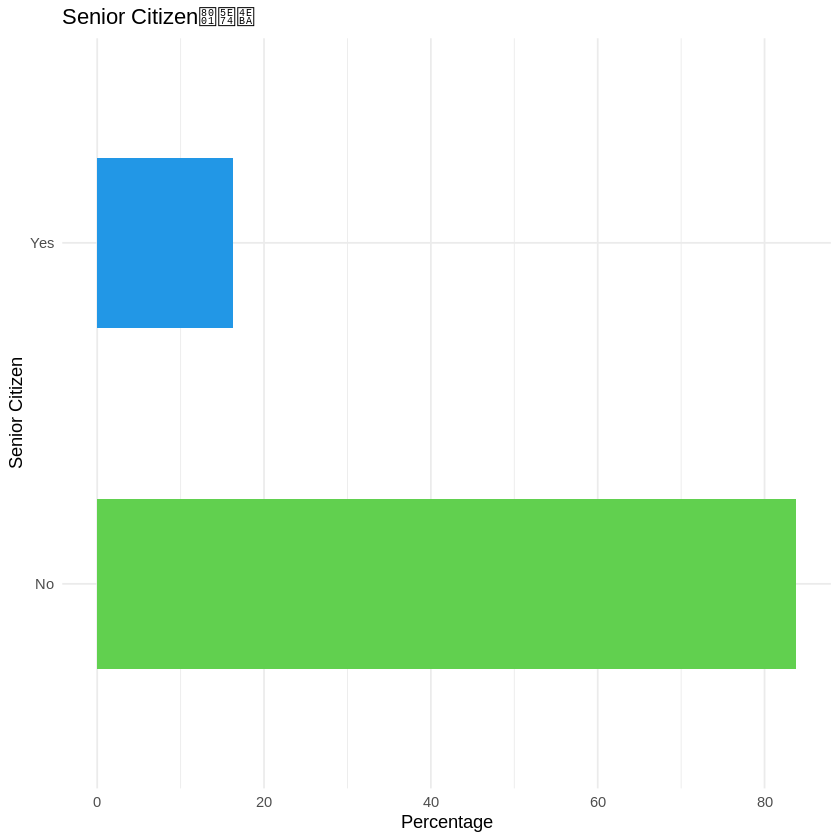

In [ ]:
p2 <- ggplot(churn, aes(x=SeniorCitizen)) + ggtitle("Senior Citizen老年人") + xlab("Senior Citizen") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:4) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p2  #Senior Citizen老年人

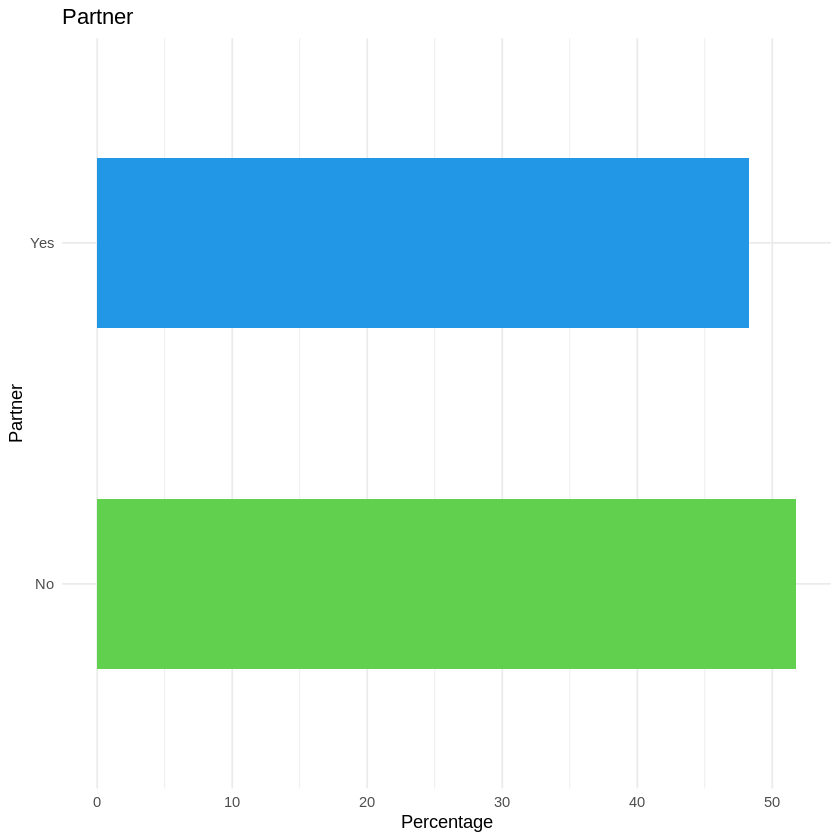

In [ ]:
p3 <- ggplot(churn, aes(x=Partner)) + ggtitle("Partner") + xlab("Partner") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:4) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p3

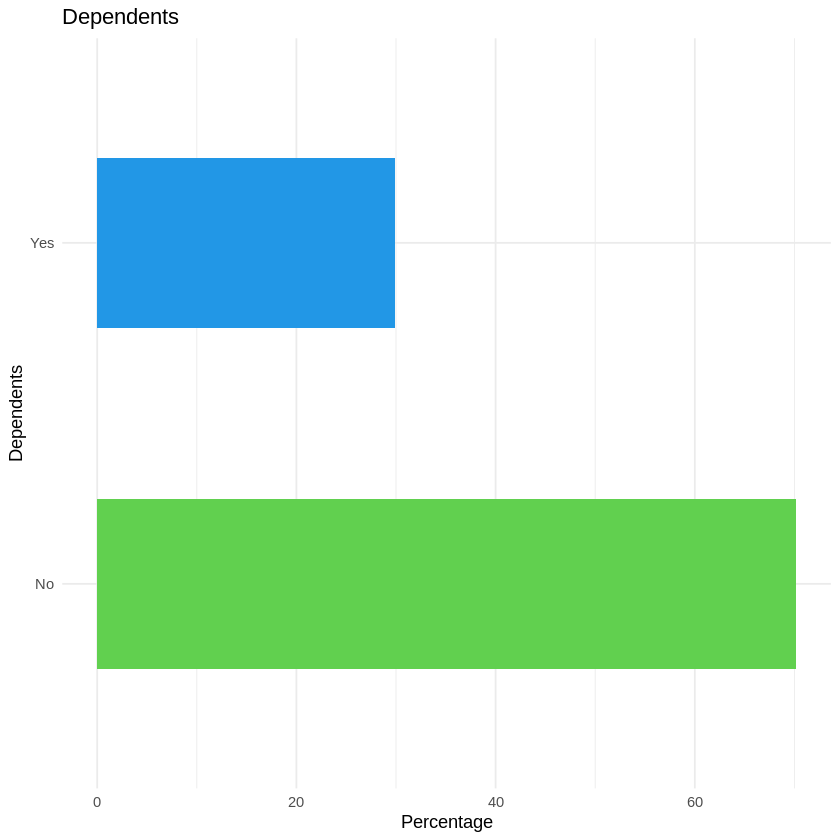

In [ ]:
p4 <- ggplot(churn, aes(x=Dependents)) + ggtitle("Dependents") + xlab("Dependents") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:4) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p4

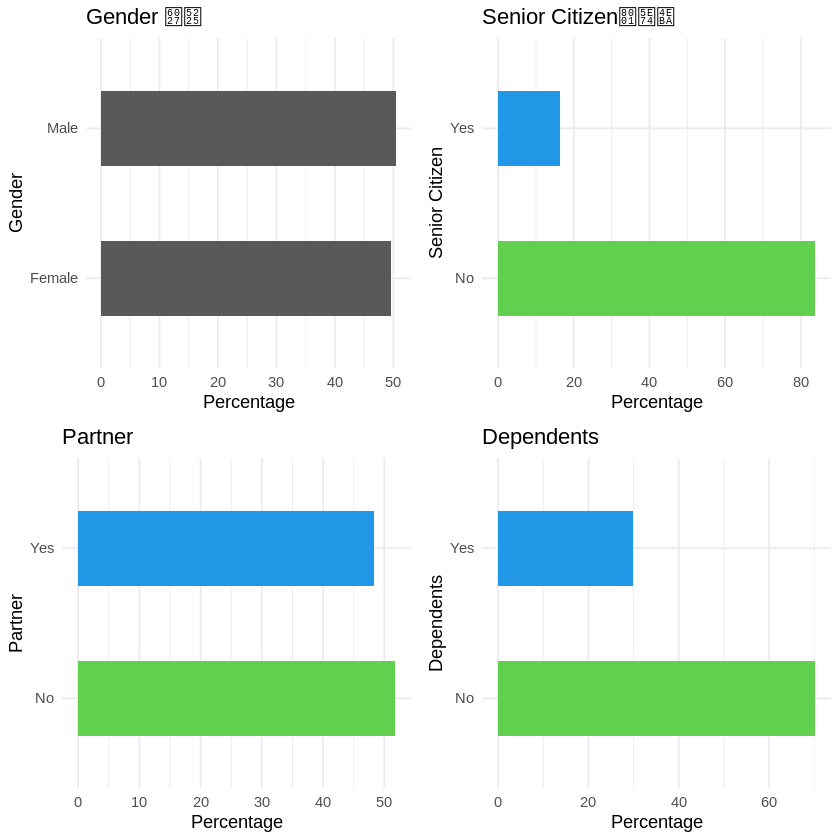

In [ ]:
grid.arrange(p1, p2, p3, p4, ncol=2)

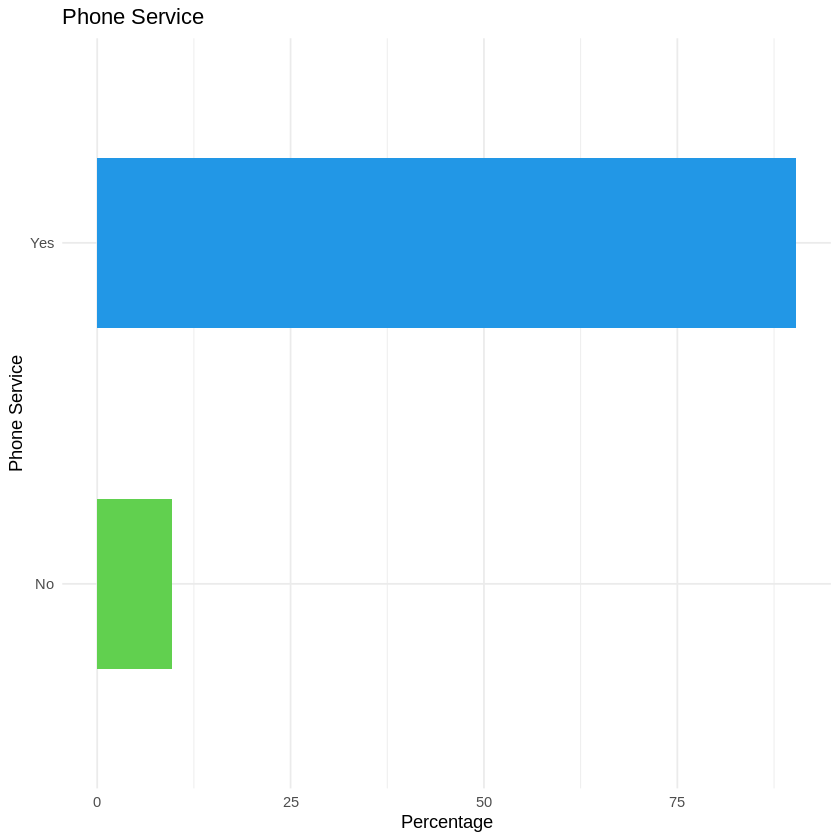

In [ ]:
p5 <- ggplot(churn, aes(x=PhoneService)) + ggtitle("Phone Service") + xlab("Phone Service") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:4) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p5

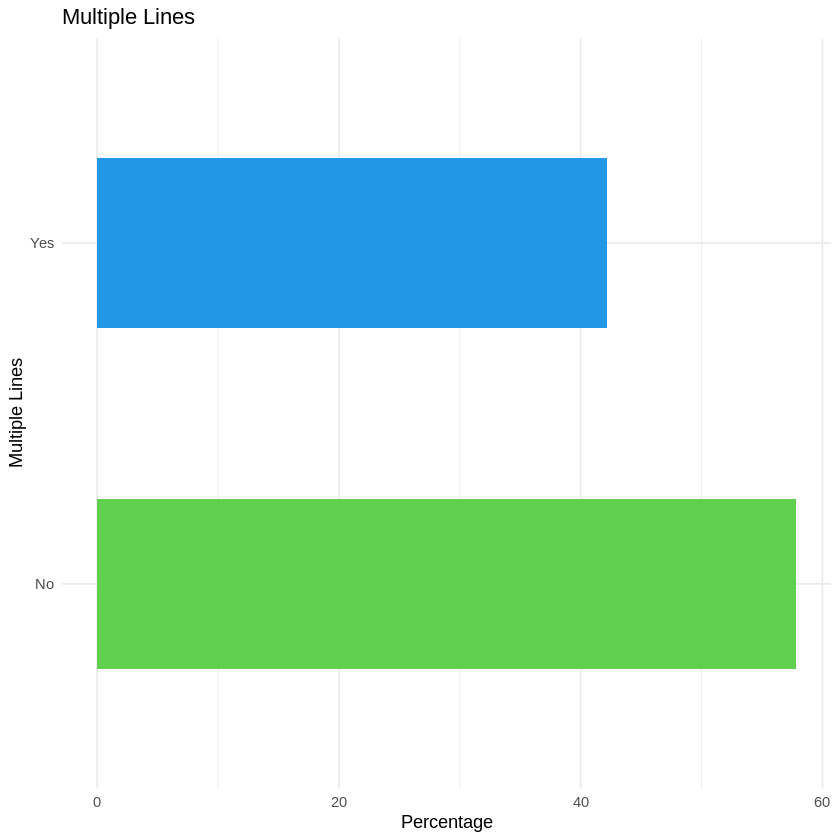

In [ ]:
p6 <- ggplot(churn, aes(x=MultipleLines)) + ggtitle("Multiple Lines") + xlab("Multiple Lines") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:4) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p6

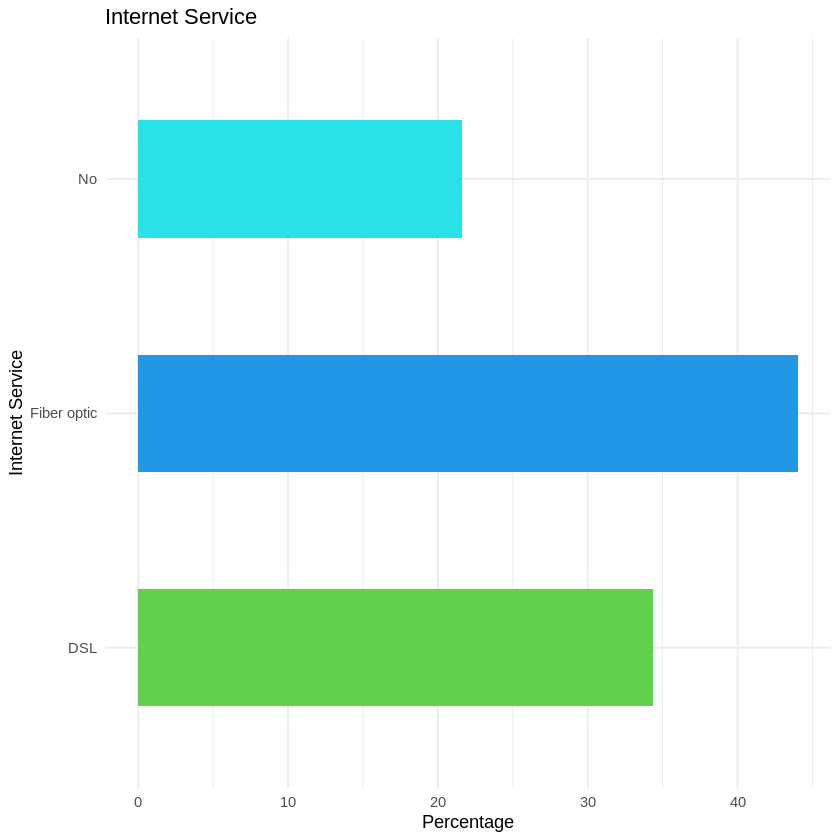

In [ ]:
p7 <- ggplot(churn, aes(x=InternetService)) + ggtitle("Internet Service") + xlab("Internet Service") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:5) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p7

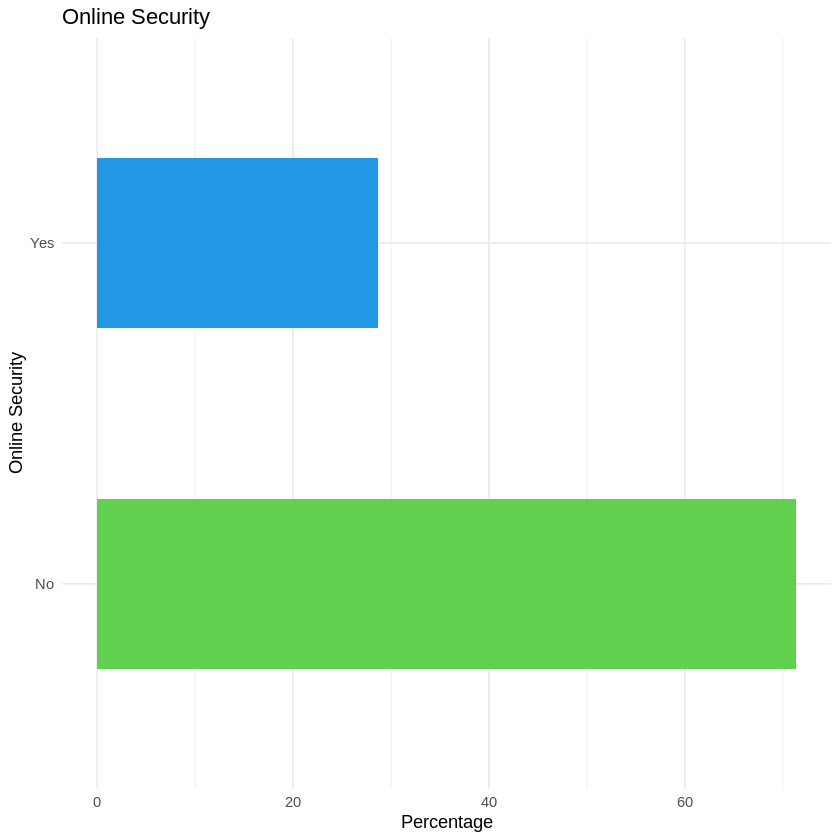

In [ ]:
p8 <- ggplot(churn, aes(x=OnlineSecurity)) + ggtitle("Online Security") + xlab("Online Security") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 3:4) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p8

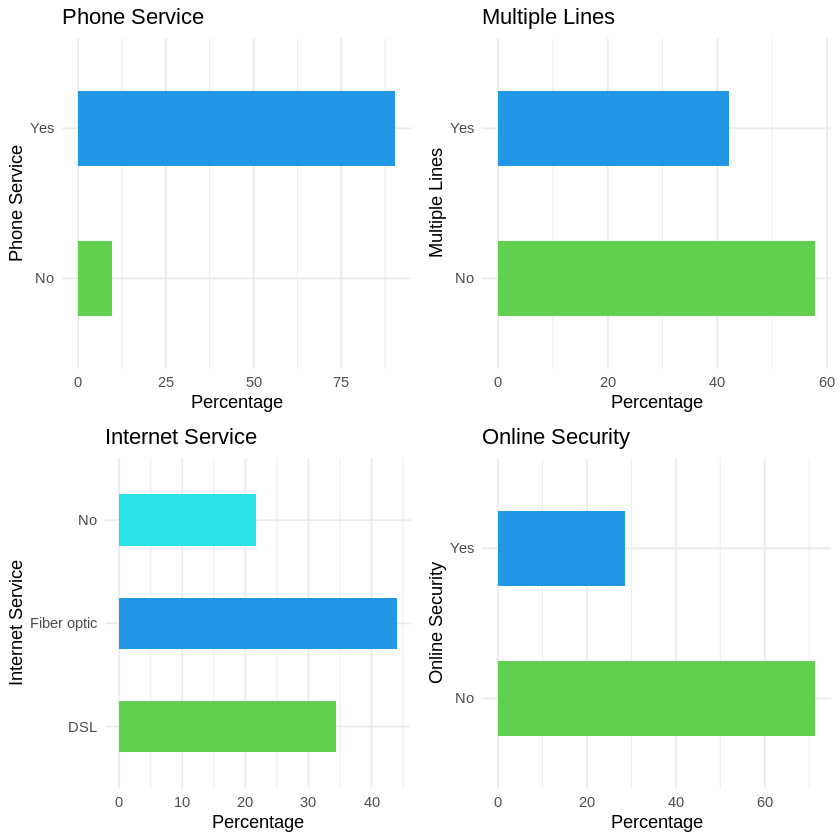

In [ ]:
grid.arrange(p5, p6, p7, p8, ncol=2)

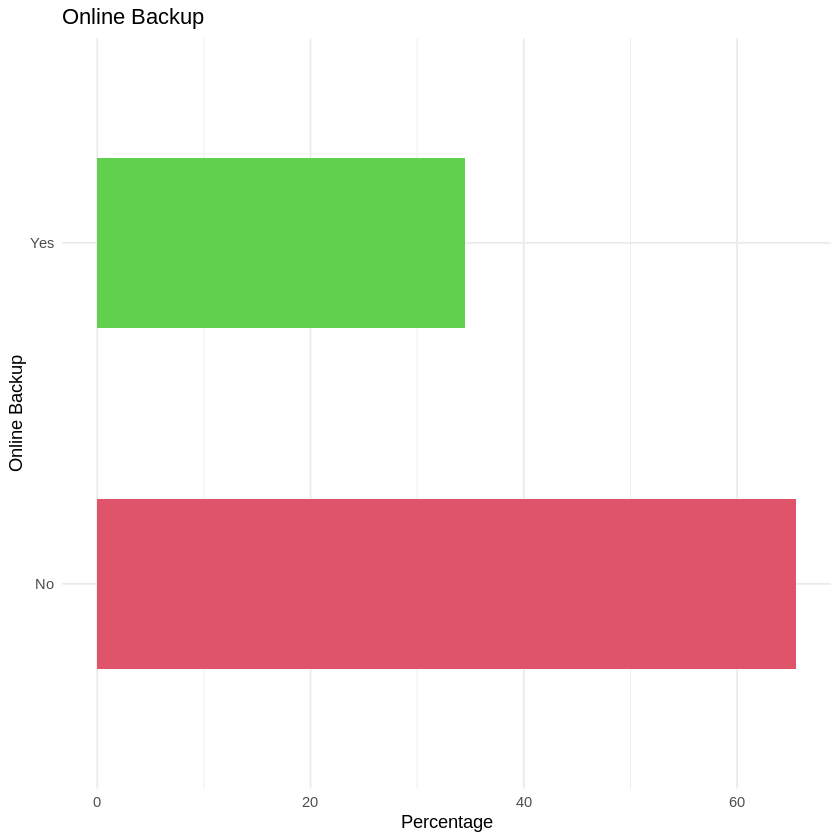

In [ ]:
p9 <- ggplot(churn, aes(x=OnlineBackup)) + ggtitle("Online Backup") + xlab("Online Backup") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 2:3) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p9

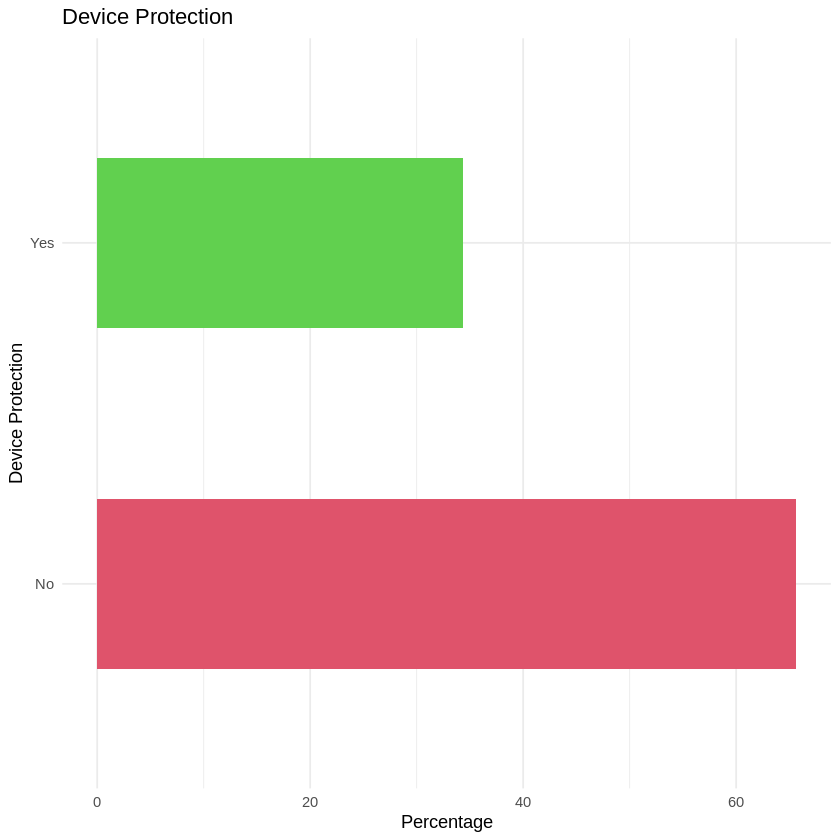

In [ ]:
p10 <- ggplot(churn, aes(x=DeviceProtection)) + ggtitle("Device Protection") + xlab("Device Protection") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 2:3) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p10

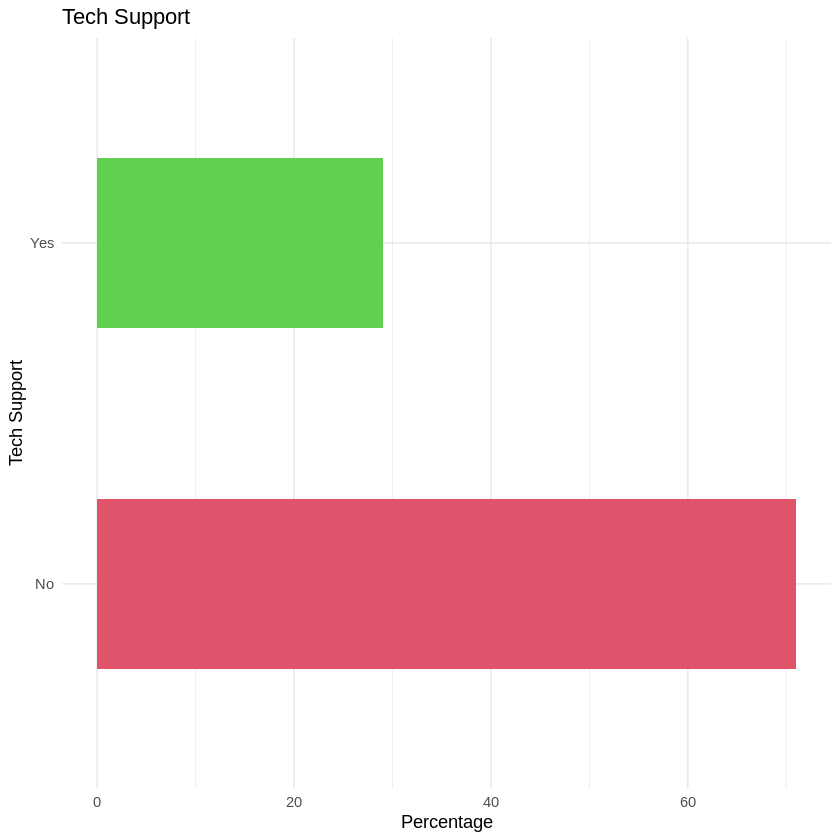

In [ ]:
p11 <- ggplot(churn, aes(x=TechSupport)) + ggtitle("Tech Support") + xlab("Tech Support") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 2:3) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p11

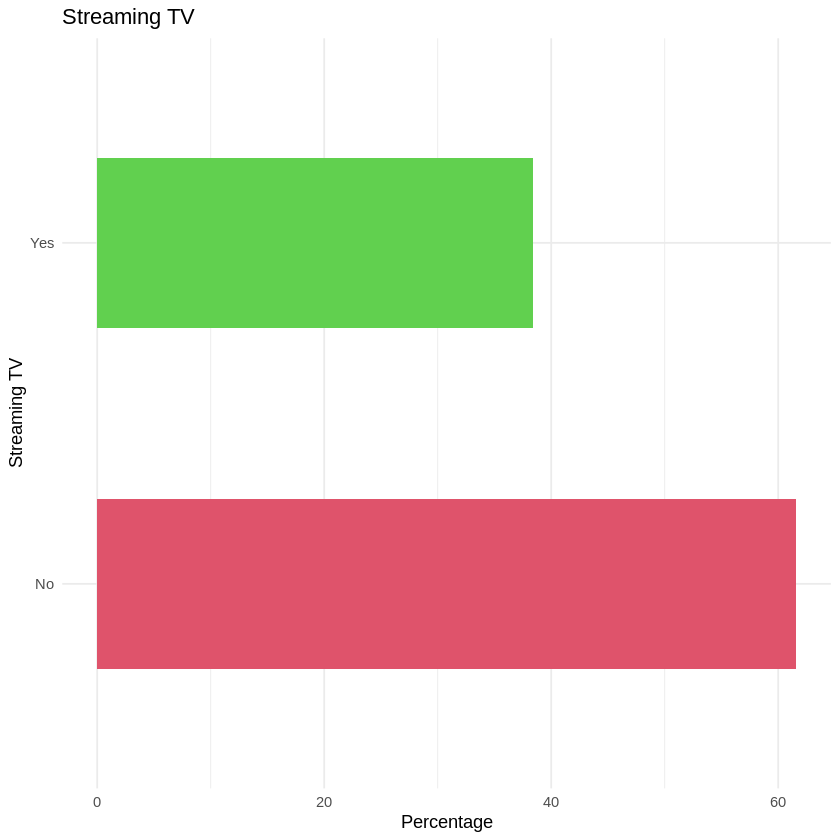

In [ ]:
p12 <- ggplot(churn, aes(x=StreamingTV)) + ggtitle("Streaming TV") + xlab("Streaming TV") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 2:3) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p12

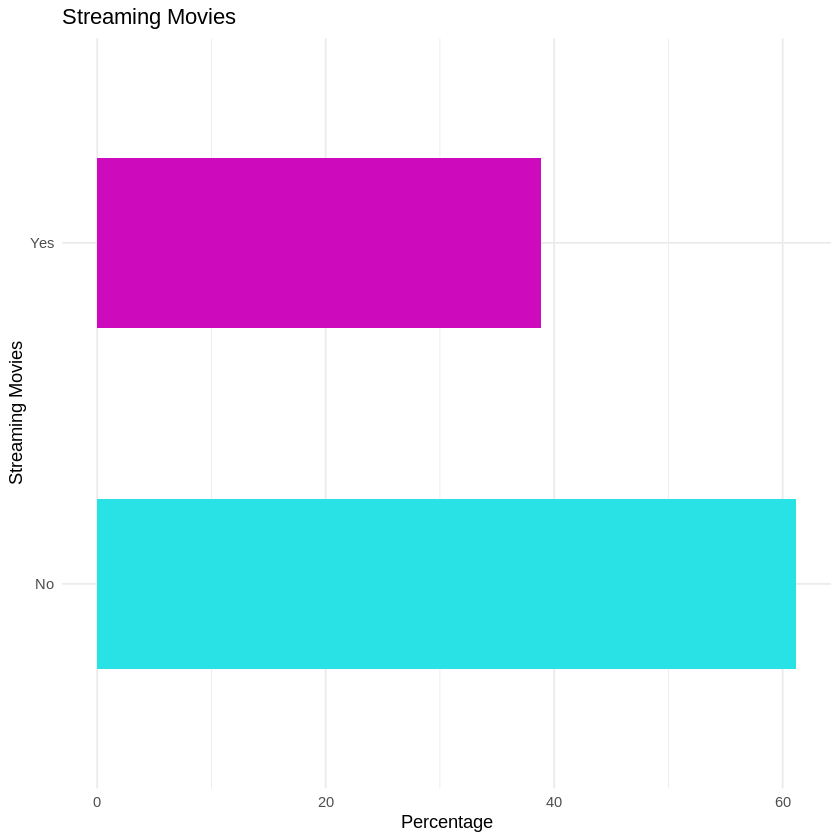

In [ ]:
p13 <- ggplot(churn, aes(x=StreamingMovies)) + ggtitle("Streaming Movies") + xlab("Streaming Movies") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 5:6) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p13

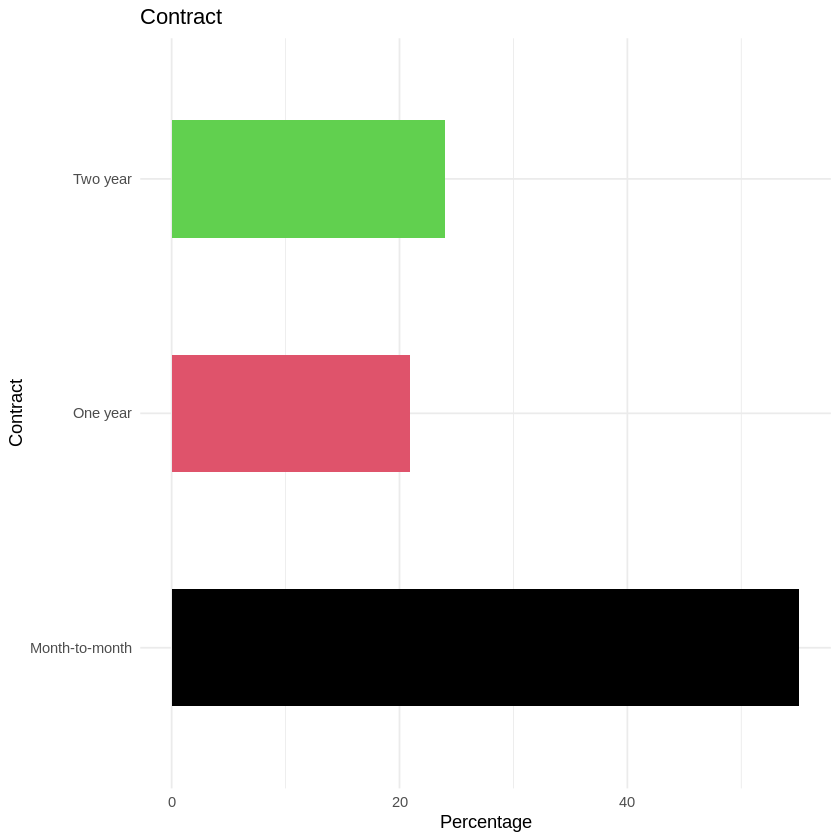

In [ ]:
p14 <- ggplot(churn, aes(x=Contract)) + ggtitle("Contract") + xlab("Contract") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 1:3) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p14

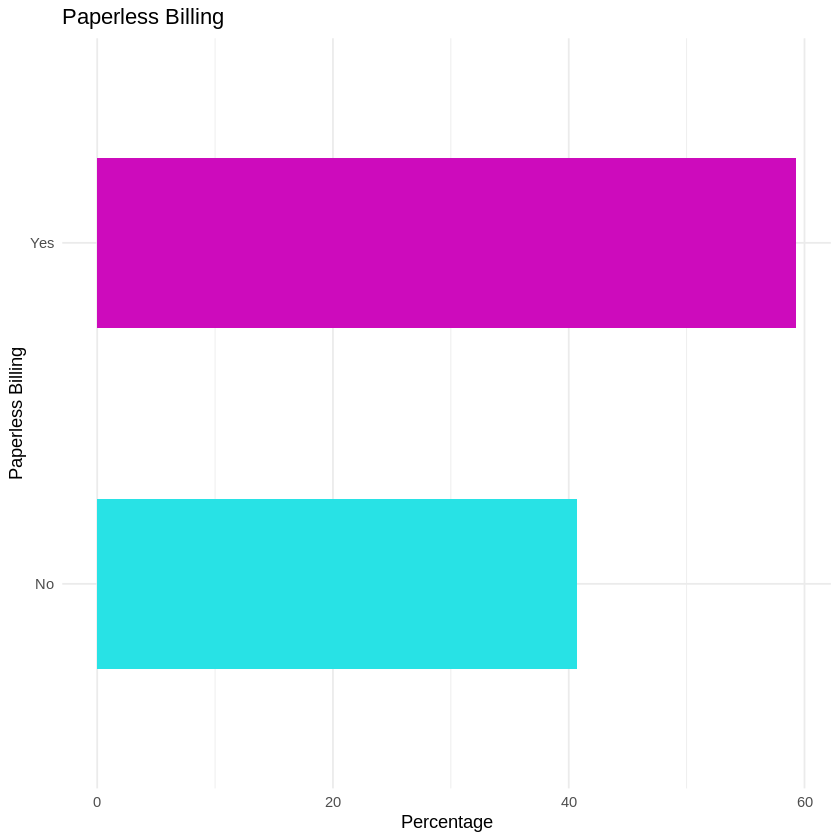

In [ ]:
p15 <- ggplot(churn, aes(x=PaperlessBilling))+ ggtitle("Paperless Billing")+ xlab("Paperless Billing")+
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 5:6) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p15

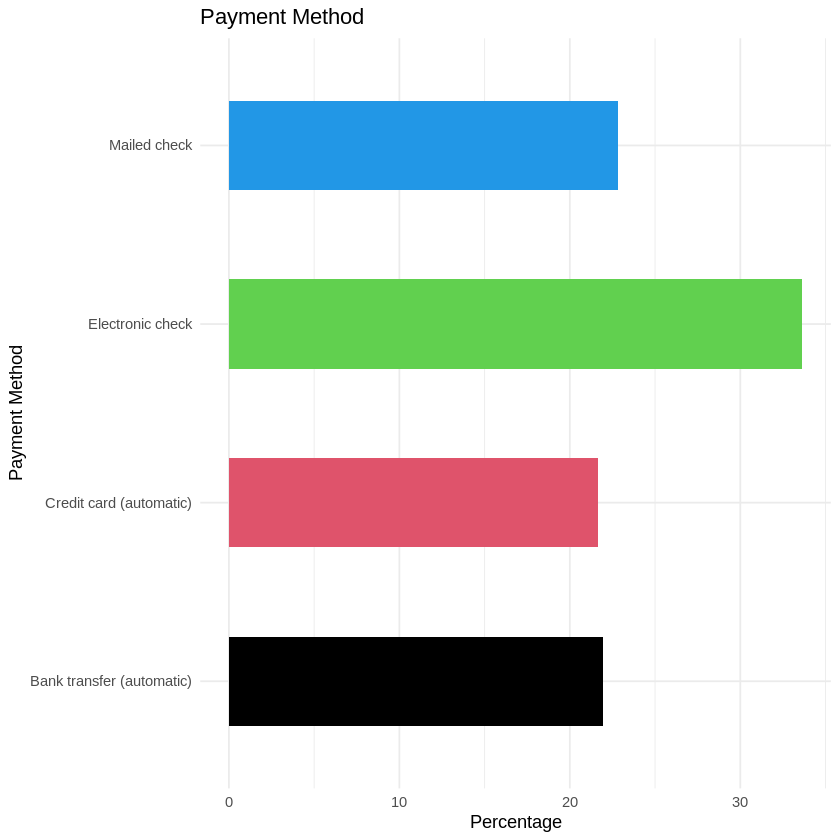

In [ ]:
p16 <- ggplot(churn, aes(x=PaymentMethod)) + ggtitle("Payment Method") + xlab("Payment Method") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 1:4) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p16

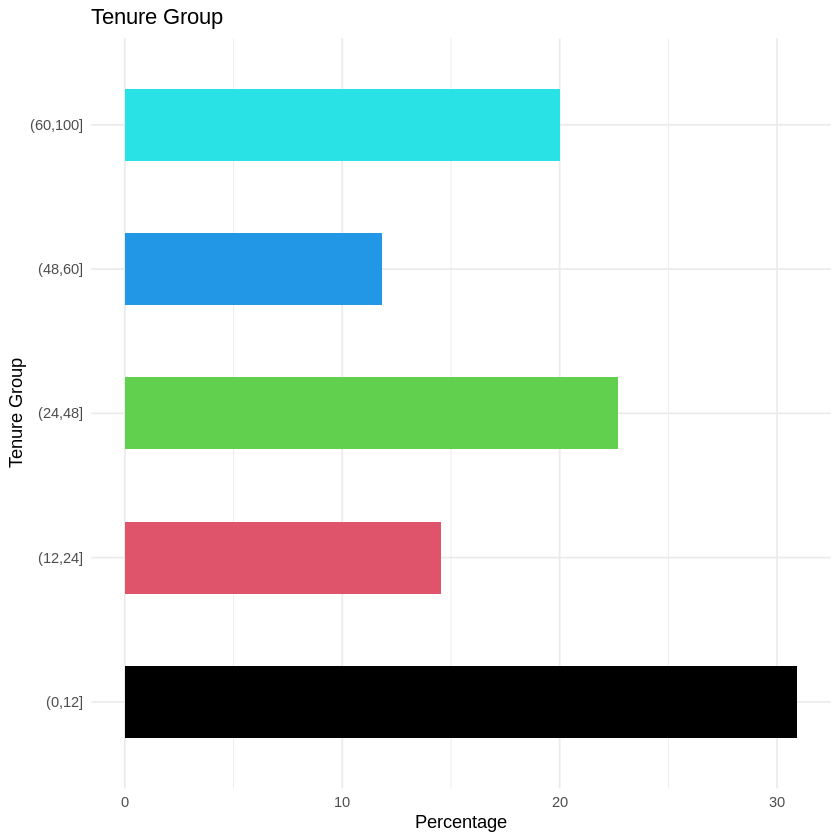

In [ ]:
p17 <- ggplot(churn, aes(x=tenure_group)) + ggtitle("Tenure Group") + xlab("Tenure Group") +
    geom_bar(aes(y = 100*(..count..)/sum(..count..)), width = 0.5, fill= 1:5) + ylab("Percentage") +
    coord_flip() + theme_minimal()
p17

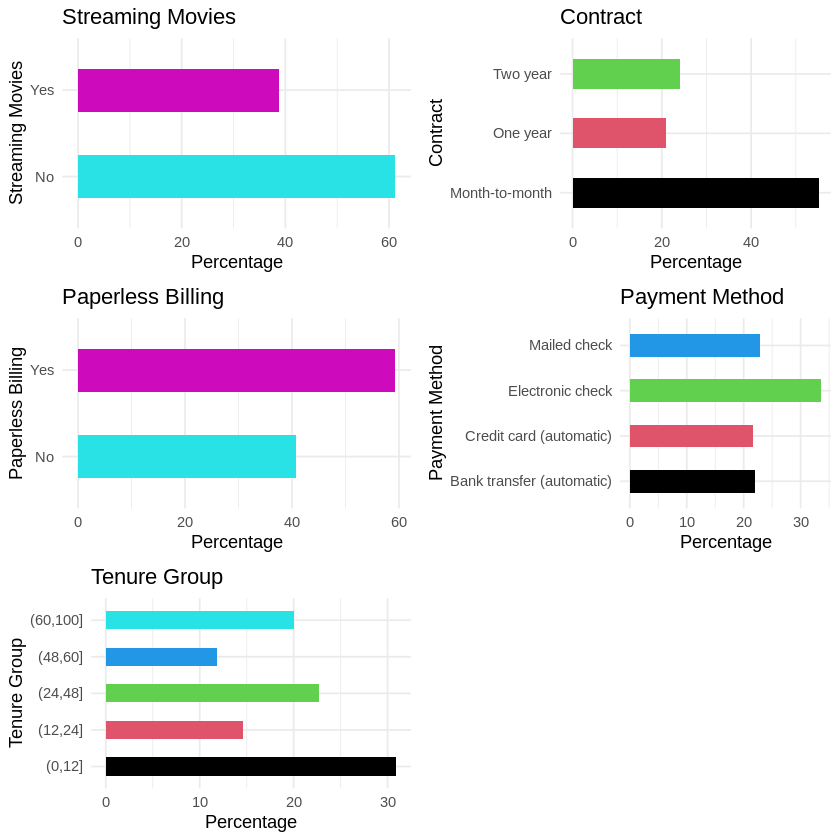

In [ ]:
grid.arrange(p13, p14, p15, p16, p17, ncol=2)

### 所有的分類變量似乎都有相當廣泛的分佈，因此，所有這些變量都將被保留用於進一步分析。
- All of the categorical variables seem to have a reasonably broad distribution, therefore, all of them will be kept for the further analysis.

# 4.0 Logistic Regression - 羅吉斯迴歸分析---

In [ ]:
### 4.0 Logistic Regression - 羅吉斯迴歸分析-----
# First, we split the data into training and testing sets
# 首先，我們將數據分成訓練和測試集
?createDataPartition

In [ ]:
# 使用createDataPartition創建一系列測試/訓練集分區

intrain<- createDataPartition(churn$Churn, p=0.7, list=FALSE) #訓練集取0.7%
set.seed(2017)
training<- churn[intrain, ]  # training dataset 訓練集
testing<- churn[-intrain, ]  # test deatset     測試集

In [ ]:
# Confirm the splitting is correct 確認拆分是否正確?
dim(training); dim(testing)
# [1] 4924   19
# [1] 2108   19

[1] 4924   19

[1] 2108   19

In [ ]:
dim(churn)  #[1] 7032   19
4924/7032   # [1] 0.7002275
2108/7032   # [1] 0.2997725

[1] 7032   19

[1] 0.7002275

[1] 0.2997725

# Fitting the Logistic Regression Model 建模步驟:

In [ ]:
# Fitting the Logistic Regression Model 建模步驟:
# 擬合羅吉斯迴歸分析模型
LogModel <- glm(Churn ~ .,family = binomial(link="logit"), data=training) #y為Churn,~ .其他為x

In [ ]:
summary(LogModel)


Call:
glm(formula = Churn ~ ., family = binomial(link = "logit"), data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0451  -0.6721  -0.2811   0.6478   3.1830  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.179703   0.964872   1.223  0.22146    
genderMale                            0.016667   0.078119   0.213  0.83105    
SeniorCitizenYes                      0.231885   0.101815   2.278  0.02276 *  
PartnerYes                           -0.048963   0.093942  -0.521  0.60223    
DependentsYes                        -0.112488   0.107048  -1.051  0.29334    
PhoneServiceYes                       0.715211   0.777574   0.920  0.35768    
MultipleLinesYes                      0.581066   0.211563   2.747  0.00602 ** 
InternetServiceFiber optic            2.504612   0.956898   2.617  0.00886 ** 
InternetServiceNo                    -2.263887   0.964360  -2.348  0.01890 *

# 5.0 特徵分析 Feature Analysis --

In [ ]:
### 5.0 特徵分析 Feature Analysis -----
# 最相關的三大功能包括Contract，tenure_group和PaperlessBilling。
#           合同，    任期組      和無紙計費
# The top three most-relevant features include Contract, tenure_group and PaperlessBilling.

In [ ]:
LogModel


Call:  glm(formula = Churn ~ ., family = binomial(link = "logit"), data = training)

Coefficients:
                         (Intercept)                            genderMale  
                            1.179703                              0.016667  
                    SeniorCitizenYes                            PartnerYes  
                            0.231885                             -0.048963  
                       DependentsYes                       PhoneServiceYes  
                           -0.112488                              0.715211  
                    MultipleLinesYes            InternetServiceFiber optic  
                            0.581066                              2.504612  
                   InternetServiceNo                     OnlineSecurityYes  
                           -2.263887                             -0.045408  
                     OnlineBackupYes                   DeviceProtectionYes  
                            0.010925                 

In [ ]:
anova(LogModel, test="Chisq") #跑ANOVA
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,4923,5702.760,NA
gender,1,0.01633035,4922,5702.743,8.983150e-01
SeniorCitizen,1,103.00366517,4921,5599.740,3.345288e-24
Partner,1,122.23329996,4920,5477.506,2.052288e-28
Dependents,1,22.21659778,4919,5455.290,2.435592e-06
PhoneService,1,1.55267503,4918,5453.737,2.127410e-01
MultipleLines,1,6.53444231,4917,5447.203,1.058054e-02
InternetService,2,498.21186611,4915,4948.991,6.526313e-109
OnlineSecurity,1,176.24040012,4914,4772.750,3.208784e-40


# 評估Logistic回歸模型的預測能力

In [ ]:
# 評估Logistic回歸模型的預測能力
# Assessing the predictive ability of the Logistic Regression model

testing$Churn <- as.character(testing$Churn) #測試集
testing$Churn[testing$Churn == "No"] <- "0"
testing$Churn[testing$Churn == "Yes"] <- "1"
fitted.results <- predict(LogModel, newdata=testing, type='response')
fitted.results
fitted.results <- ifelse(fitted.results > 0.5, 1, 0)
fitted.results
misClasificError <- mean(fitted.results != testing$Churn)
print(paste('Logistic Regression Accuracy', 1-misClasificError))
# [1] "Logistic Regression Accuracy 0.793643263757116"  >> 79.36%

2           3           9          11          12          15 
0.041629149 0.279280481 0.540270885 0.140984183 0.012786862 0.391383677 
         16          20          22          23          26          30 
0.026100893 0.519463585 0.088906181 0.181948741 0.085363054 0.287131383 
         36          39          43          49          50          58 
0.017584595 0.535714532 0.033121536 0.022646912 0.010586845 0.247454814 
         60          69          74          78          80          82 
0.061479322 0.005771346 0.009692399 0.178532681 0.038440534 0.503642388 
         83          87          88          89          92          93 
0.631656838 0.057689096 0.007435027 0.011667021 0.630052606 0.020308598 
         94          96          98          99         108         109 
0.247452138 0.713896453 0.174032268 0.006547826 0.068358001 0.288544382 
        114         120         121         123         128         130 
0.507744189 0.222358791 0.246539218 0.777306846 0.011294321 0.116353253 
        132         144         146         153         155         159 
0.189239095 0.092398541 0.024355365 0.137691995 0.160534015 0.023172652 
        161         163         177         178         181         183 
0.140136935 0.718069843 0.556627004 0.497309104 0.352014050 0.698054733 
        185         188         189         190         193         198 
0.451573696 0.436444208 0.055579368 0.091548938 0.004937732 0.391530440 
        205         207         214         215         220         221 
0.258614667 0.012598681 0.033794665 0.583138368 0.674091413 0.712559999 
        223         225         226         227         228         229 
0.149654072 0.128348085 0.193365989 0.062448843 0.348180887 0.386402215 
        236         237         239         244         246         253 
0.412260066 0.114191540 0.796319738 0.231127182 0.609750379 0.533120684 
        257         269         271         272         273         281 
0.023417525 0.007674394 0.614449434 0.011617163 0.426829638 0.198621222 
        285         294         303         304         306         308 
0.434209682 0.844519274 0.728199857 0.014904800 0.008407046 0.022098150 
        310         311         312         314         317         318 
0.113969452 0.236066841 0.432434737 0.757472905 0.007727099 0.029728503 
        324         343         353         355         356         359 
0.129122580 0.057694230 0.846091773 0.362913860 0.700132433 0.136505539 
        362         363         366         369         371         372 
0.069688791 0.040840370 0.662874494 0.249788147 0.024458344 0.795593735 
        373         375         378         382         383         384 
0.021187412 0.349393502 0.444775022 0.256873167 0.021126238 0.678895811 
        398         401         402         403         405         407 
0.266293963 0.027900594 0.084684836 0.371668361 0.019679827 0.150282038 
        411         414         415         423         425         426 
0.745539536 0.330753000 0.360646737 0.126042210 0.279553544 0.120174374 
        432         433         441         444         445         446 
0.015082521 0.350205821 0.462897256 0.230832543 0.390086356 0.467161458 
        448         453         454         457         458         459 
0.010872842 0.169465590 0.438696819 0.102279713 0.015187056 0.176078763 
        460         461         470         473         474         475 
0.769936187 0.170000508 0.221644839 0.531379170 0.094106317 0.618631539 
        476         478         479         482         484         488 
0.496997442 0.272091428 0.745139431 0.219506317 0.164444595 0.018062709 
        490         491         497         501         506         509 
0.757782292 0.067340757 0.046074635 0.116297907 0.656407882 0.669700823 
        512         514         517         518         521         526 
0.404881082 0.303155227 0.033981202 0.678026624 0.238228370 0.132351595 
        530         531         535         540         545         

2    3    9   11   12   15   16   20   22   23   26   30   36   39   43   49 
   0    0    1    0    0    0    0    1    0    0    0    0    0    1    0    0 
  50   58   60   69   74   78   80   82   83   87   88   89   92   93   94   96 
   0    0    0    0    0    0    0    1    1    0    0    0    1    0    0    1 
  98   99  108  109  114  120  121  123  128  130  132  144  146  153  155  159 
   0    0    0    0    1    0    0    1    0    0    0    0    0    0    0    0 
 161  163  177  178  181  183  185  188  189  190  193  198  205  207  214  215 
   0    1    1    0    0    1    0    0    0    0    0    0    0    0    0    1 
 220  221  223  225  226  227  228  229  236  237  239  244  246  253  257  269 
   1    1    0    0    0    0    0    0    0    0    1    0    1    1    0    0 
 271  272  273  281  285  294  303  304  306  308  310  311  312  314  317  318 
   1    0    0    0    0    1    1    0    0    0    0    0    0    1    0    0 
 324  343  353  355  356  359  362  363  366  369  371  372  373  375  378  382 
   0    0    1    0    1    0    0    0    1    0    0    1    0    0    0    0 
 383  384  398  401  402  403  405  407  411  414  415  423  425  426  432  433 
   0    1    0    0    0    0    0    0    1    0    0    0    0    0    0    0 
 441  444  445  446  448  453  454  457  458  459  460  461  470  473  474  475 
   0    0    0    0    0    0    0    0    0    0    1    0    0    1    0    1 
 476  478  479  482  484  488  490  491  497  501  506  509  512  514  517  518 
   0    0    1    0    0    0    1    0    0    0    1    1    0    0    0    1 
 521  526  530  531  535  540  545  561  563  564  576  578  582  584  589  590 
   0    0    0    0    1    0    0    0    0    0    0    1    0    0    0    0 
 594  599  600  601  603  614  616  618  625  626  633  634  639  640  641  642 
   0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0 
 647  648  651  655  658  662  665  666  668  672  675  676  677  680  681  685 
   0    0    1    0    0    0    0    1    0    0    0    0    0    0    1    1 
 697  700  701  706  707  710  714  719  726  736  737  741  742  745  748  749 
   0    0    0    0    0    0    0    0    0    0    0    0    1    0    1    0 
 756  763  769  773  774  779  782  786  791  798  800  801  812  815  818  822 
   1    1    0    0    1    0    0    0    0    0    0    0    0    0    0    0 
 831  832  834  835  843  844  845  846  857  858  859  863  865  866  868  870 
   0    0    0    1    0    0    1    0    0    0    0    0    1    1    0    0 
 872  876  879  880  886  889  894  896  901  902  909  912  920  921  927  929 
   0    1    0    0    0    0    1    0    0    1    0    0    0    0    1    0 
 930  934  935  936  941  947  948  950  955  958  961  967  971  974  975  977 
   0    1    0    1    0    0    0    0    1    0    0    0    1    0    0    1 
 986  988  991  994  995  996  997  999 1004 1006 1018 1021 1024 1037 1040 1041 
   0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0 
1042 1045 1046 1047 1048 1049 1060 1062 1064 1065 1066 1072 1078 1079 1080 1086 
   0    0    1    0    0    0    1    0    0    0    0    0    0    0    1    1 
1091 1092 1101 1103 1113 1115 1117 1118 1123 1124 1126 1129 1130 1139 1142 1143 
   0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    1 
1154 1158 1160 1169 1172 1182 1183 1184 1185 1192 1198 1199 1201 1207 1217 1218 
   0    0    1    0    0    0    0    0    0    0    0    0    0    1    0    0 
1219 1222 1226 1227 1228 1230 1237 1242 1244 1248 1254 1255 1260 1264 1267 1271 
   0    1    0    0    0    0    1    0    0    0    1    0    0    0    1    0 
1272 1276 1278 1279 1281 1284 1291 1294 1296 1298 1299 1302 1308 1311 1320 1321 
   0    0    0    0    0    0    0    0    0    1    0    0    0    1    0    0 
1326 1327 1328 1329 1330 1333 1337 1340 1342 1349 1353 1359 1361 1365 1366 1368 
   1    0    0    0    0    0    0

[1] "Logistic Regression Accuracy 0.788899430740038"


# 6.0 Logistic Regression Confusion Matrix 回歸混淆矩陣-------

In [ ]:
print("Confusion Matrix for Logistic Regression"); table(testing$Churn, fitted.results > 0.5)
# [1] "Confusion Matrix for Logistic Regression"
#
#   FALSE TRUE
# 0  1395  153
# 1   247  313

[1] "Confusion Matrix for Logistic Regression"


ERROR: ignored

In [ ]:
(247+153)/(1395+153+247+313) #不分類的比例
#[1] 0.1897533

[1] 0.1897533

# 8.0 Decision Tree 決策樹---

In [ ]:
### 8.0 Decision Tree 決策樹--------
# Decision Tree visualization 決策樹可視化
# For illustration purpose, we are going to use only three variables for plotting Decision Trees, they are “Contract”, “tenure_group” and “PaperlessBilling”.
# 為了便於說明，我們將僅使用三個變量來繪製決策樹，它們是“合同”，“任期組”和“無紙化計費”。

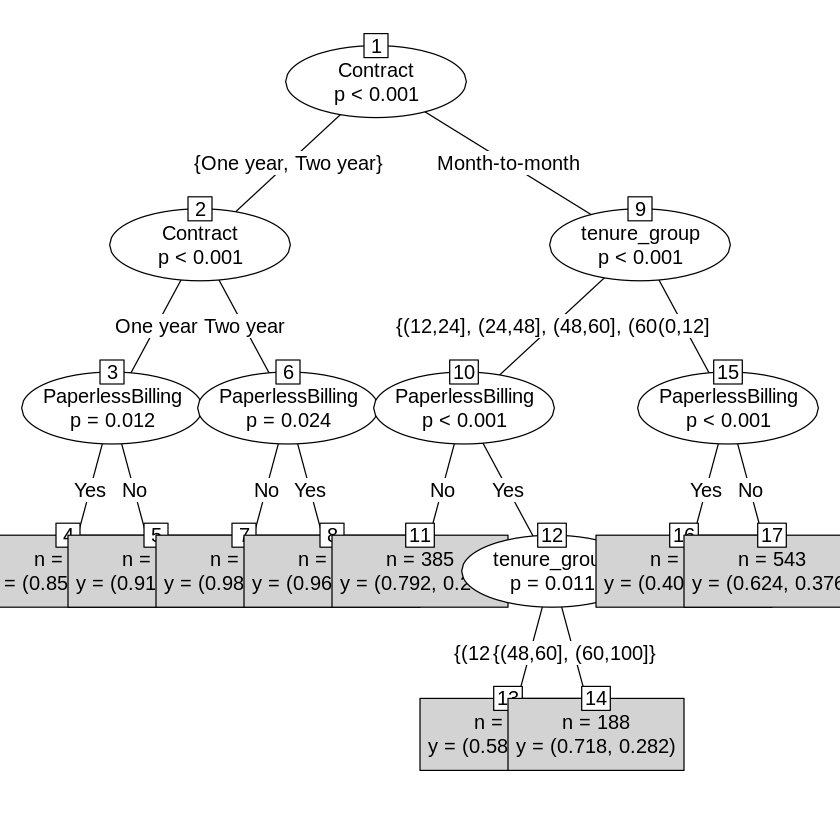

In [ ]:
tree <- ctree(Churn ~ Contract+tenure_group+PaperlessBilling, training)
plot(tree, type='simple')

In [ ]:
tree


	 Conditional inference tree with 9 terminal nodes

Response:  Churn 
Inputs:  Contract, tenure_group, PaperlessBilling 
Number of observations:  4924 

1) Contract == {One year, Two year}; criterion = 1, statistic = 825.512
  2) Contract == {One year}; criterion = 1, statistic = 75.149
    3) PaperlessBilling == {Yes}; criterion = 0.988, statistic = 8.325
      4)*  weights = 561 
    3) PaperlessBilling == {No}
      5)*  weights = 452 
  2) Contract == {Two year}
    6) PaperlessBilling == {No}; criterion = 0.976, statistic = 7.023
      7)*  weights = 627 
    6) PaperlessBilling == {Yes}
      8)*  weights = 550 
1) Contract == {Month-to-month}
  9) tenure_group == {(12,24], (24,48], (48,60], (60,100]}; criterion = 1, statistic = 96.517
    10) PaperlessBilling == {No}; criterion = 1, statistic = 38.563
      11)*  weights = 385 
    10) PaperlessBilling == {Yes}
      12) tenure_group == {(12,24], (24,48]}; criterion = 0.989, statistic = 13.562
        13)*  weights = 755 
     

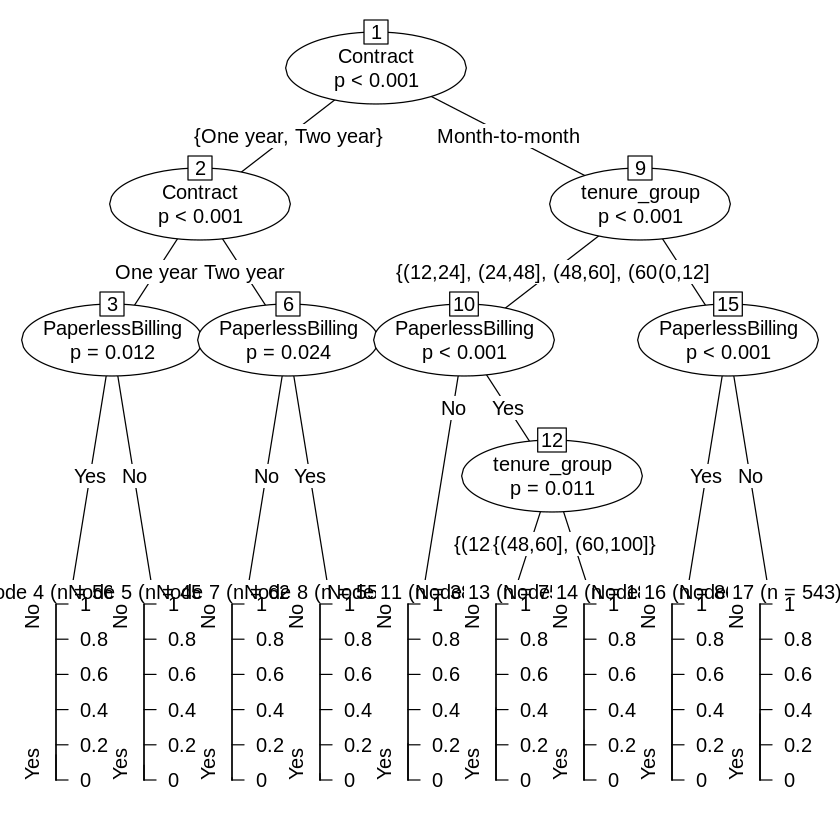

In [ ]:
plot(tree)

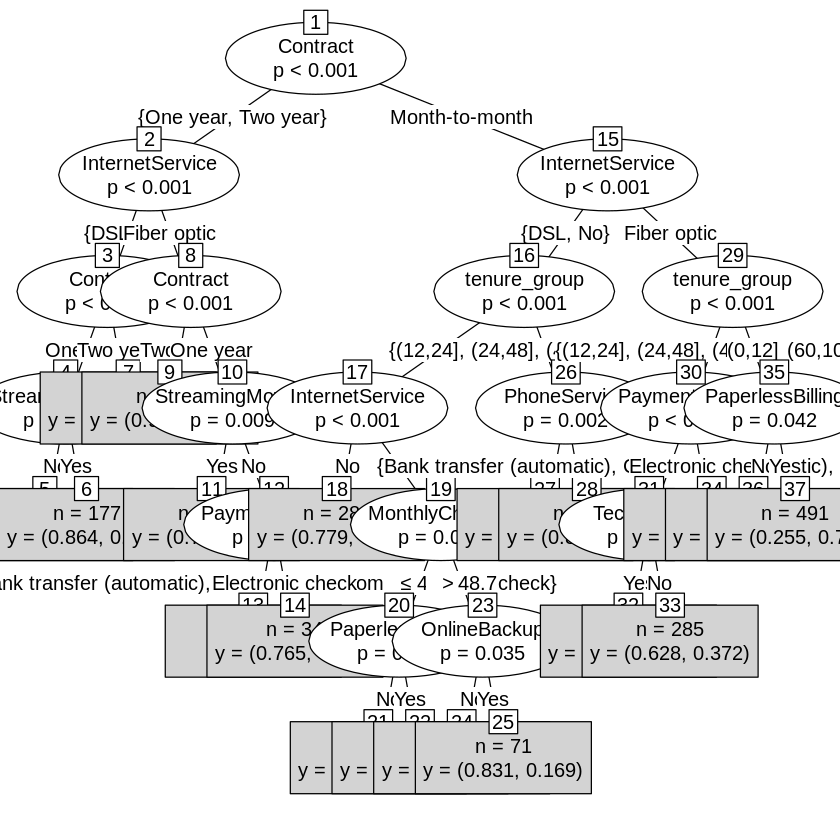

In [ ]:
treeAll <- ctree(Churn ~ ., training)
plot(treeAll, type='simple')

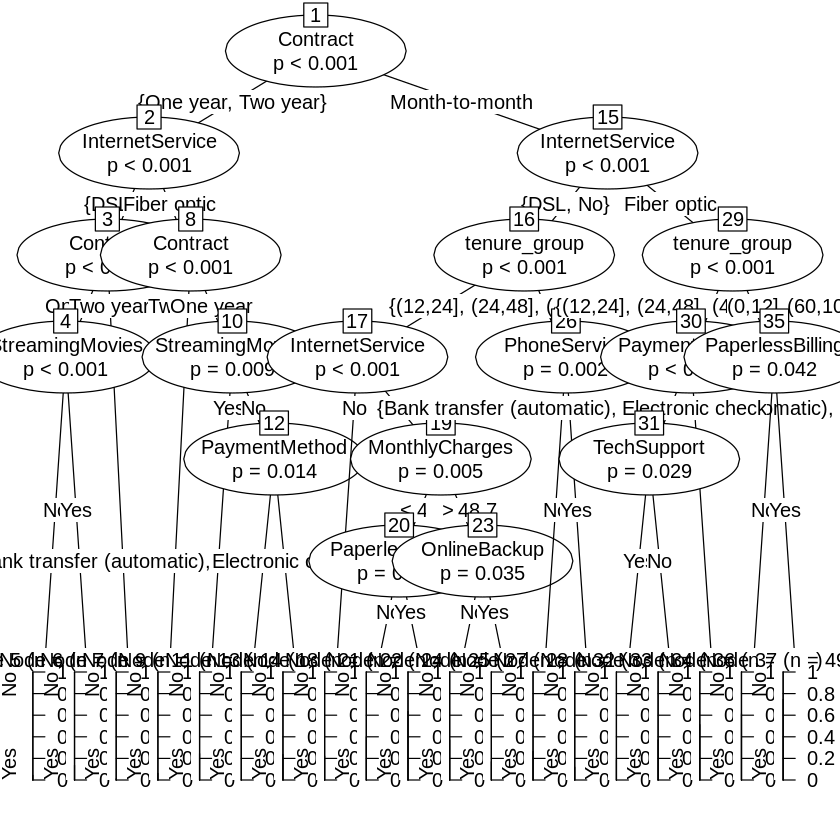

In [ ]:
plot(treeAll)

## 結論
1. 在我們使用的三個變量中，契約是預測客戶流失或不流失的最重要變量。
2. 如果客戶在一年或兩年的合同中，無論他（她）是否有PapelessBilling，他（她）都不太可能流失。
3. 另一方面，如果客戶處於月度合同中，並且在0-12個月的任期組中，並且使用PaperlessBilling，則該客戶更有可能流失。

In [ ]:
# 決策樹混淆矩陣
# 我們使用所有變量來產生混淆矩陣表並進行預測。
# 1. Out of three variables we use, Contract is the most important variable to predict customer churn or not churn.
# 2. If a customer in a one-year or two-year contract, no matter he (she) has PapelessBilling or not, he (she) is less likely to churn.
# 3. On the other hand, if a customer is in a month-to-month contract, and in the tenure group of 0–12 month, and using PaperlessBilling, then this customer is more likely to churn.
#
# Decision Tree Confusion Matrix
# We are using all the variables to product confusion matrix table and make predictions.

In [ ]:
pred_tree <- predict(tree, testing)
print("Confusion Matrix for Decision Tree"); table(Predicted = pred_tree, Actual = testing$Churn)
# [1] "Confusion Matrix for Decision Tree"
#            Actual
# Predicted    0    1
#       No  1388  333
#       Yes  160  227

[1] "Confusion Matrix for Decision Tree"


         Actual
Predicted    0    1
      No  1396  343
      Yes  152  217

In [ ]:
pred_treeAll <- predict(treeAll, testing)
pred_treeAll

[1] No  No  Yes No  No  Yes No  Yes No  No  No  No  No  Yes No  No  No  No 
  [19] No  No  No  No  No  No  Yes No  No  No  Yes No  No  Yes No  No  No  No 
  [37] Yes No  No  Yes No  No  No  No  No  No  No  No  No  Yes No  Yes No  Yes
  [55] Yes No  No  No  No  Yes No  No  No  Yes Yes Yes No  No  No  No  No  No 
  [73] No  No  Yes Yes Yes No  No  No  Yes No  No  No  No  Yes Yes No  No  No 
  [91] No  No  Yes Yes No  No  No  No  Yes No  Yes No  No  No  Yes No  No  Yes
 [109] No  No  No  No  No  Yes No  No  No  No  No  No  Yes Yes No  No  No  No 
 [127] No  No  Yes No  Yes Yes No  No  Yes No  No  No  Yes No  No  No  No  Yes
 [145] Yes No  Yes No  No  No  Yes No  No  No  Yes Yes Yes No  No  Yes No  No 
 [163] No  No  Yes No  No  No  No  No  No  Yes Yes No  No  No  No  No  No  No 
 [181] No  No  No  No  No  Yes No  No  No  Yes No  No  Yes No  Yes No  No  No 
 [199] No  Yes No  No  No  No  No  No  Yes Yes No  No  No  No  No  No  No  No 
 [217] No  No  No  No  Yes Yes Yes No  Yes Yes Yes No  Yes No  No  No  No  No 
 [235] No  No  No  No  No  No  No  No  Yes Yes No  No  Yes No  No  No  No  Yes
 [253] No  Yes No  No  No  Yes No  No  No  No  No  No  No  Yes No  No  No  No 
 [271] Yes No  No  Yes No  Yes No  No  No  No  Yes No  No  No  Yes No  No  Yes
 [289] No  No  No  No  No  No  No  No  No  No  No  No  Yes No  Yes No  No  No 
 [307] No  No  No  No  Yes No  No  No  No  No  No  No  Yes Yes No  No  No  No 
 [325] No  No  No  No  No  No  Yes No  No  No  No  Yes No  No  Yes No  No  No 
 [343] No  No  No  No  No  No  No  Yes No  No  No  Yes No  No  No  No  Yes No 
 [361] No  No  Yes No  No  No  Yes No  No  No  No  No  No  No  No  No  No  Yes
 [379] No  No  No  Yes No  No  Yes No  No  No  No  No  No  No  No  Yes No  Yes
 [397] Yes No  No  Yes No  Yes No  No  No  No  No  No  Yes Yes Yes No  No  Yes
 [415] No  No  Yes No  No  No  Yes Yes No  No  No  No  Yes No  Yes No  No  No 
 [433] No  No  Yes No  Yes Yes Yes No  No  No  Yes No  Yes No  No  No  No  No 
 [451] No  No  No  No  Yes No  No  No  No  No  No  No  No  No  No  No  No  No 
 [469] No  No  No  No  Yes No  No  No  No  No  Yes No  No  Yes No  No  Yes No 
 [487] No  Yes Yes No  No  No  Yes No  No  No  Yes No  No  No  No  Yes No  No 
 [505] No  No  Yes No  Yes No  Yes No  No  No  No  No  No  Yes No  Yes No  No 
 [523] No  No  Yes No  No  Yes No  No  Yes No  No  Yes Yes No  No  No  No  Yes
 [541] No  Yes No  No  Yes No  No  No  No  No  No  No  No  No  No  No  Yes No 
 [559] No  No  Yes No  No  No  No  No  No  Yes No  No  No  No  Yes No  No  No 
 [577] No  No  Yes Yes No  Yes No  No  Yes No  No  No  No  Yes No  No  No  No 
 [595] No  No  Yes Yes No  No  No  No  No  No  Yes No  Yes No  No  Yes Yes Yes
 [613] No  No  No  Yes No  No  No  Yes No  No  No  No  Yes Yes No  No  Yes No 
 [631] No  Yes No  No  No  No  No  Yes No  No  No  No  No  No  No  No  Yes No 
 [649] No  No  No  No  No  No  Yes No  No  Yes No  Yes No  No  Yes No  No  No 
 [667] Yes Yes No  Yes No  No  No  Yes No  No  No  No  No  No  No  No  No  No 
 [685] No  No  No  Yes Yes Yes No  No  No  No  No  No  Yes No  No  No  No  Yes
 [703] Yes Yes No  Yes Yes No  No  No  No  No  No  No  No  No  Yes No  Yes Yes
 [721] No  Yes No  No  No  No  Yes Yes No  No  No  No  No  Yes No  No  No  No 
 [739] No  Yes No  No  No  No  Yes No  No  No  No  No  No  No  No  No  Yes No 
 [757] No  No  No  Yes No  No  No  No  No  No  Yes No  No  Yes No  No  Yes No 
 [775] No  No  No  Yes No  No  No  No  No  No  No  No  No  Yes No  No  Yes No 
 [793] Yes Yes No  Yes No  No  No  No  No  No  Yes No  Yes No  No  No  No  No 
 [811] No  No  No  No  Yes No  No  No  No  No  Yes Yes No  No  No  Yes No  No 
 [829] No  No  No  No  No  No  No  No  No  Yes No  No  No  No  No  Yes No  No 
 [847] Yes No  No  No  No  No  No  No  No  Yes No  Yes Yes No  No  Yes No  No 
 [865] No  Yes No  No  No  No  Yes No  No  No  Yes No  No  Yes No  No  Yes Yes
 [883] No  No  No  No  No  No  No  No  No  Yes No  No  Yes No  No  Yes No  No 
 [901] No  No  Yes No  Yes No  No  No  No  No  Yes No

In [ ]:
# Decision Tree Accuracy
p1 <- predict(tree, training)
tab1 <- table(Predicted = p1, Actual = training$Churn)
tab2 <- table(Predicted = pred_tree, Actual = testing$Churn)
print(paste('Decision Tree Accuracy',sum(diag(tab2))/sum(tab2)))
# [1] "Decision Tree Accuracy 0.766129032258065"

[1] "Decision Tree Accuracy 0.765180265654649"


In [ ]:
p1A <- predict(treeAll, training)
tab1a <- table(Predicted = p1A, Actual = training$Churn)
tab2a <- table(Predicted = pred_treeAll, Actual = testing$Churn)
print(paste('Decision Tree Accuracy',sum(diag(tab2a))/sum(tab2a)))
# [1] "Decision Tree Accuracy 0.786053130929791"

# The accuracy for Decision Tree has hardly improved. Let’s see if we can do better using Random Forest.

[1] "Decision Tree Accuracy 0.775142314990512"


# 9.0 Random Forest 隨機森林

In [ ]:
### 9.0 Random Forest 隨機森林---------
# Random Forest Initial Model

rfModel <- randomForest(Churn ~., data = training)
print(rfModel)


Call:
 randomForest(formula = Churn ~ ., data = training) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 20.82%
Confusion matrix:
      No Yes class.error
No  3234 381   0.1053942
Yes  644 665   0.4919786


The error rate is relatively low when predicting “No”, and the error rate is much higher when predicting “Yes”.

In [ ]:
# Random Forest Prediction and Confusion Matrix
pred_rf <- predict(rfModel, testing)
pred_rf
# caret::confusionMatrix(pred_rf, testing$Churn)

2    3    9   11   12   15   16   20   22   23   26   30   36   39   43   49 
  No   No  Yes   No   No   No   No  Yes   No   No   No   No   No  Yes   No   No 
  50   58   60   69   74   78   80   82   83   87   88   89   92   93   94   96 
  No   No   No   No   No   No   No   No  Yes   No   No   No   No   No   No  Yes 
  98   99  108  109  114  120  121  123  128  130  132  144  146  153  155  159 
  No   No   No   No  Yes   No   No  Yes   No   No   No   No   No   No   No   No 
 161  163  177  178  181  183  185  188  189  190  193  198  205  207  214  215 
  No  Yes  Yes  Yes   No  Yes  Yes   No   No   No   No   No   No   No   No  Yes 
 220  221  223  225  226  227  228  229  236  237  239  244  246  253  257  269 
 Yes  Yes   No   No   No   No   No   No   No   No  Yes   No   No  Yes   No   No 
 271  272  273  281  285  294  303  304  306  308  310  311  312  314  317  318 
  No   No   No   No   No  Yes  Yes   No   No   No   No   No   No  Yes   No   No 
 324  343  353  355  356  359  362  363  366  369  371  372  373  375  378  382 
  No   No  Yes   No  Yes   No   No   No  Yes   No   No  Yes   No   No   No   No 
 383  384  398  401  402  403  405  407  411  414  415  423  425  426  432  433 
  No  Yes   No   No   No   No   No   No  Yes   No   No   No   No   No   No   No 
 441  444  445  446  448  453  454  457  458  459  460  461  470  473  474  475 
 Yes   No  Yes   No   No   No  Yes   No   No   No  Yes   No   No   No   No  Yes 
 476  478  479  482  484  488  490  491  497  501  506  509  512  514  517  518 
 Yes   No  Yes   No   No   No  Yes   No   No   No  Yes   No   No   No   No  Yes 
 521  526  530  531  535  540  545  561  563  564  576  578  582  584  589  590 
  No   No   No   No  Yes   No   No   No   No   No   No  Yes   No   No   No   No 
 594  599  600  601  603  614  616  618  625  626  633  634  639  640  641  642 
  No   No   No   No   No   No   No   No   No   No   No   No   No  Yes   No   No 
 647  648  651  655  658  662  665  666  668  672  675  676  677  680  681  685 
 Yes   No  Yes   No   No   No   No  Yes   No   No   No   No   No   No  Yes  Yes 
 697  700  701  706  707  710  714  719  726  736  737  741  742  745  748  749 
  No   No   No   No   No   No   No   No  Yes   No   No   No  Yes  Yes  Yes   No 
 756  763  769  773  774  779  782  786  791  798  800  801  812  815  818  822 
 Yes  Yes  Yes   No  Yes   No   No   No   No   No   No   No   No   No   No   No 
 831  832  834  835  843  844  845  846  857  858  859  863  865  866  868  870 
  No   No   No  Yes   No   No  Yes   No   No   No   No  Yes  Yes  Yes   No   No 
 872  876  879  880  886  889  894  896  901  902  909  912  920  921  927  929 
  No   No   No   No   No   No   No  Yes   No  Yes   No   No   No   No  Yes   No 
 930  934  935  936  941  947  948  950  955  958  961  967  971  974  975  977 
  No  Yes   No  Yes   No   No   No   No  Yes   No  Yes   No  Yes   No   No  Yes 
 986  988  991  994  995  996  997  999 1004 1006 1018 1021 1024 1037 1040 1041 
  No   No   No   No   No   No   No   No   No   No   No   No  Yes   No   No   No 
1042 1045 1046 1047 1048 1049 1060 1062 1064 1065 1066 1072 1078 1079 1080 1086 
  No   No   No   No   No   No  Yes   No   No   No   No   No   No   No  Yes  Yes 
1091 1092 1101 1103 1113 1115 1117 1118 1123 1124 1126 1129 1130 1139 1142 1143 
  No   No   No   No   No  Yes   No   No   No   No  Yes   No  Yes   No   No  Yes 
1154 1158 1160 1169 1172 1182 1183 1184 1185 1192 1198 1199 1201 1207 1217 1218 
  No   No  Yes   No   No   No   No   No   No   No   No   No   No  Yes   No   No 
1219 1222 1226 1227 1228 1230 1237 1242 1244 1248 1254 1255 1260 1264 1267 1271 
  No   No   No   No   No   No  Yes   No  Yes   No  Yes   No   No   No  Yes   No 
1272 1276 1278 1279 1281 1284 1291 1294 1296 1298 1299 1302 1308 1311 1320 1321 
  No   No   No   No   No   No   No   No   No  Yes   No   No   No  Yes   No   No 
1326 1327 1328 1329 1330 1333 1337 1340 1342 1349 1353 1359 1361 1365 1366 1368 
 Yes   No   No   No   No   No   No

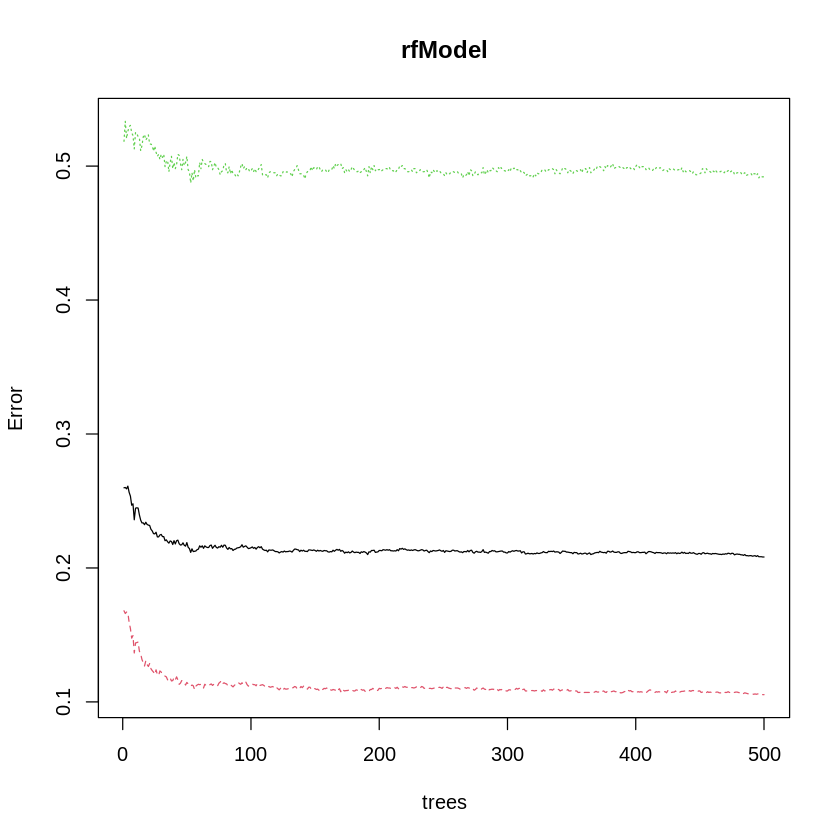

In [ ]:
# Random Forest Error Rate
plot(rfModel)

We use this plot to help us determine the number of trees. As the number of trees increases, the OOB error rate decreases, and then becomes almost constant. We are not able to decrease the OOB error rate after about 100 to 200 trees.

mtry = 4  OOB error = 20.76% 
Searching left ...
mtry = 8 	OOB error = 21.63% 
-0.04207436 0.05 
Searching right ...
mtry = 2 	OOB error = 19.98% 
0.037182 0.05 

Call:
 randomForest(formula = Churn ~ ., data = training, ntree = 200,      mtry = 2, importance = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.88%
Confusion matrix:
      No Yes class.error
No  3330 285  0.07883817
Yes  694 615  0.53017571


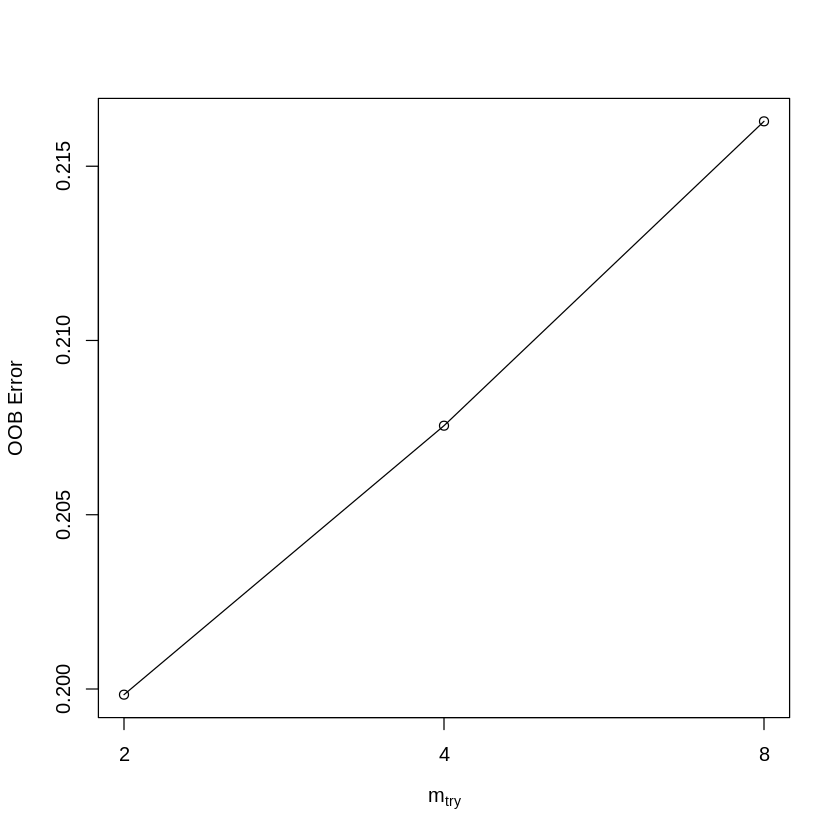

In [ ]:
# Tune Random Forest Model

t <- tuneRF(training[, -18], training[, 18], stepFactor = 0.5, plot = TRUE,
            ntreeTry = 200, trace = TRUE, improve = 0.05)

# Gives this plot:
# We use this plot to give us some ideas on the number of mtry to choose. OOB error rate is at the lowest when mtry is 2. Therefore, we choose mtry=2.

# Fit the Random Forest Model After Tuning

rfModel_new <- randomForest(Churn ~., data = training, ntree = 200, mtry = 2,
                            importance = TRUE, proximity = TRUE)
print(rfModel_new)

In [ ]:
# Random Forest Predictions and Confusion Matrix After Tuning

pred_rf_new <- predict(rfModel_new, testing)
pred_rf_new

3    4   15   18   24   28   29   32   41   46   48   50   57   58   60   63 
  No   No   No   No   No   No   No  Yes   No  Yes  Yes   No   No   No   No   No 
  64   71   79   87   89   90   91   92   95   96  101  106  114  118  121  124 
  No   No   No   No   No   No   No   No   No  Yes   No   No  Yes  Yes   No   No 
 125  128  132  133  135  136  138  139  140  141  146  149  153  157  159  163 
  No   No   No   No   No   No   No   No  Yes   No   No   No   No   No   No  Yes 
 179  180  182  187  189  191  192  193  196  204  205  206  208  212  219  220 
 Yes   No   No   No   No   No  Yes   No   No   No   No   No  Yes   No   No  Yes 
 229  230  235  238  241  243  248  252  253  254  258  264  269  271  274  276 
  No   No   No  Yes   No   No  Yes  Yes   No   No   No   No   No   No   No  Yes 
 277  286  288  292  296  298  299  301  302  303  304  306  309  314  318  321 
  No   No  Yes   No   No  Yes   No   No  Yes  Yes   No   No   No  Yes   No   No 
 322  326  332  336  338  340  353  357  359  362  363  366  376  378  382  383 
  No   No   No   No   No   No  Yes   No   No   No   No  Yes   No   No   No   No 
 392  397  403  404  411  417  421  426  434  435  437  447  453  454  456  461 
  No   No   No   No  Yes   No   No   No   No   No   No  Yes   No   No  Yes   No 
 464  467  470  472  473  475  476  479  481  490  493  494  498  502  503  509 
 Yes   No   No   No   No  Yes  Yes  Yes   No  Yes  Yes   No   No   No   No   No 
 510  516  517  518  524  528  530  532  540  545  547  548  549  554  555  563 
  No   No   No  Yes   No   No   No   No   No   No   No   No   No   No   No   No 
 569  574  578  580  581  583  586  589  595  600  604  609  622  625  629  632 
 Yes   No  Yes   No   No  Yes  Yes   No   No   No   No   No   No   No   No   No 
 636  638  641  642  645  651  652  653  654  656  663  664  665  666  667  670 
  No   No   No   No   No  Yes  Yes   No   No   No   No   No   No  Yes  Yes   No 
 672  673  682  689  693  696  700  704  712  716  731  732  740  741  748  750 
  No  Yes   No   No   No   No   No   No   No   No   No   No   No   No  Yes   No 
 752  756  759  760  762  765  769  770  771  773  774  775  777  781  785  789 
  No  Yes   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
 790  795  797  800  803  805  806  809  812  814  818  825  826  827  830  833 
  No   No   No   No   No  Yes   No  Yes   No   No   No   No   No  Yes   No   No 
 834  839  840  842  844  852  854  856  857  865  867  869  874  878  879  888 
  No   No   No   No   No   No   No   No   No  Yes   No   No   No   No   No   No 
 895  909  910  913  918  920  924  930  933  936  939  940  942  946  950  952 
  No   No   No   No   No   No   No   No   No  Yes   No   No   No  Yes   No  Yes 
 956  959  960  970  975  976  977  978  980  986  988  991  994 1005 1006 1007 
  No   No   No  Yes   No   No  Yes  Yes   No  Yes   No   No   No   No   No   No 
1008 1011 1014 1018 1020 1021 1023 1024 1025 1026 1027 1034 1037 1039 1042 1043 
 Yes   No   No   No   No   No  Yes   No   No   No  Yes   No   No   No   No   No 
1045 1047 1050 1051 1054 1057 1067 1068 1069 1073 1075 1077 1079 1081 1082 1086 
  No   No   No   No  Yes  Yes   No   No   No   No   No   No   No   No  Yes  Yes 
1095 1101 1104 1106 1108 1111 1113 1121 1128 1130 1131 1136 1137 1146 1148 1149 
  No   No   No  Yes   No   No   No   No   No  Yes   No   No   No   No   No  Yes 
1153 1157 1158 1159 1166 1170 1172 1173 1174 1179 1182 1189 1198 1200 1205 1208 
  No   No   No   No   No   No   No   No   No   No   No   No   No   No   No   No 
1209 1211 1214 1221 1222 1224 1225 1229 1233 1237 1238 1242 1248 1258 1259 1261 
 Yes  Yes   No   No   No  Yes   No   No   No  Yes   No   No   No   No   No   No 
1268 1269 1272 1276 1277 1283 1286 1288 1291 1293 1295 1298 1299 1302 1310 1316 
  No   No   No   No   No   No  Yes   No   No   No   No  Yes   No   No  Yes   No 
1319 1323 1336 1339 1342 1351 1354 1358 1361 1365 1376 1383 1387 1388 1390 1392 
  No   No   No   No   No   No   No

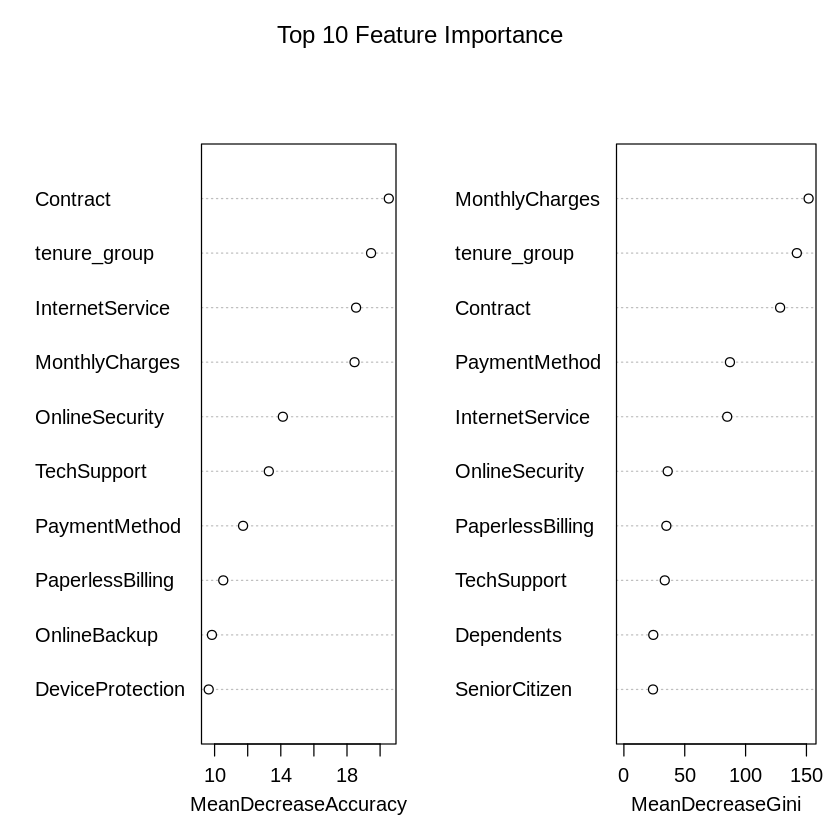

In [ ]:
# The accuracy did not increase but the sensitivity improved, compare with the initial Random Forest model.
# Random Forest Feature Importance

varImpPlot(rfModel_new, sort=T, n.var = 10, main = 'Top 10 Feature Importance')
# Gives this plot:

# 總結
從上面的示例中，可以看到Logistic回歸和隨機森林比決策樹更好地執行此特定數據集的客戶流失分析。
在整個分析過程中，結果總結為以下：
1. tenure_group，Contract，PaperlessBilling，MonthlyCharges和InternetService
    等功能似乎在客戶流失中起作用。
2. 性別和流失之間似乎沒有關係。
3. 使用PaperlessBilling的月度合同中的客戶在12個月內任期內，更容易流失;
另一方面，沒有使用PaperlessBilling的一年或兩年合同期限超過12個月的客戶不太可能流失。

# Summary
From the above example, we can see that Logistic Regression and Random Forest performed better than Decision Tree for customer churn analysis for this particular dataset.
Throughout the analysis, I have learned several important things:
1. Features such as tenure_group, Contract, PaperlessBilling, MonthlyCharges and InternetService appear to play a role in customer churn.
2. There does not seem to be a relationship between gender and churn.
3. Customers in a month-to-month contract, with PaperlessBilling and are within 12 months tenure, are more likely to churn; On the other hand, customers with one or two year contract, with longer than 12 months tenure, that are not using PaperlessBilling, are less likely to churn.